## Problem Statement:

- A Microfinance Institution (MFI) is an organization that offers financial services to low-income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. 


- The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.


- Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. 


- The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers


- The Aim is to Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Code to display rows and column borders

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

#### Code to display all the columns in the dataset

In [3]:
pd.set_option('display.max_columns', None)

#### Code to hide warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [5]:
df = pd.read_csv("Data file.csv")

In [6]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Data Head

In [7]:
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Data Tail

In [8]:
df.tail(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


## Column info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

#### Data Description:

- A total of 209593 entries in the data set

- 36 column names

- Data types include Float, Int and Objects

- No null values in the data set

### Problem Type

-  Given the number of  inputs the Machine learning Algorithm has to 
   predict the Label column.


-  If Label is 1 then the loan has been paid. if 0 then the loan is unpaid. 


-  Target Variable is Label. The target variable only has two distinct values.


-  Solving it as a Classification problem.

### Lets check for duplicate values

In [10]:
df.duplicated().sum()

0

No duplicated values in the dataset

### Lets check for missing values

In [11]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Luckly no null values in the data set

## Data Cleaning

In [12]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Droping the "Unnamed: 0" column as it has no significance in furthur analysis 

In [13]:
df = df.drop("Unnamed: 0",axis=1)

In [14]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


The columns "pcircle" only has one value so it will be better if we drop that columns

In [15]:
df = df.drop("pcircle",axis=1)

In [16]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [17]:
df["msisdn"].dtype

dtype('O')

- The MSISDN is Mobile Station International Subscriber Directory Number
it consists of 3 sections Country code, national destination code, and subscriber number.


- In the column "msisdn" there is an alphabetical letter "I" which is not appropriate.


- The MSISDN number must be a 10 digit number and with country-specific code it becomes a 12 digit number.


- We need to remove the "I" alphabet from the number.

In [18]:
df["msisdn"] = df["msisdn"].str.split().str[0]

In [19]:
df['msisdn'] = df['msisdn'].apply(lambda x: x.split()[0].replace("I",""))

The code above will remove the alphabet "I" from the MSISDN column

In [20]:
df["msisdn"].dtype

dtype('O')

We need to convert the object datatype to Int datatype for the column "msisdn"

In [21]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,0381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [22]:
df['msisdn'] = pd.to_numeric(df['msisdn'])

In [23]:
df['msisdn'].dtype

dtype('int64')

We have converted the Object dtype to Int dtype

In [24]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


We need to extract "Month" and "Day" information from pdate column

In [25]:
df['pdate'] = pd.to_datetime(df['pdate'])

Creating two new columns "Month" and "Day" from pdate column

In [26]:
df['Month']=df['pdate'].apply(lambda a:a.month)
df['Day']=df['pdate'].apply(lambda a:a.day)

In [27]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Day
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,7,20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8,10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8,19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,22


Lets create two new dataframes "Loan_Paid" and "Not_Paid"

In [28]:
Loan_Paid = df[df['label'] == 1]
Not_Paid = df[df['label'] == 0]

In [29]:
print("Total customers =", len(df))

print("Number of customeres who paid the loan =", len(Loan_Paid))

print("Percentage of customeres who paid the loan =", 1.*len(Loan_Paid)/len(df)*100.0, "%")

print("Number of customeres who did not pay the loan =", len(Not_Paid))

print("Percentage of customeres who did not Pay the loan =", 1.*len(Not_Paid)/len(df)*100.0, "%")

Total customers = 209593
Number of customeres who paid the loan = 183431
Percentage of customeres who paid the loan = 87.5177129007171 %
Number of customeres who did not pay the loan = 26162
Percentage of customeres who did not Pay the loan = 12.482287099282896 %


The data set is highly imbalanced

In [30]:
df[df["aon"] == -48]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Day
3451,1,9036888659,-48.0,3.636000,3.636000,13.84,13.84,4.0,0.0,173,3,1.0,519.0,173.0,12.8,4,1,1466,173.0,52.3,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
6489,1,9018582735,-48.0,4.746333,4.746333,-37.37,-37.37,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
9160,1,5920990589,-48.0,1.302000,1.302000,109.25,109.25,2.0,0.0,773,3,0.0,1719.0,773.0,56.8,4,33,6933,773.0,28.8,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
9261,1,236970378,-48.0,4.282333,4.282333,151.17,151.17,6.0,0.0,773,3,0.0,1719.0,773.0,229.5,3,0,1719,773.0,229.5,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
11199,1,7543488648,-48.0,2.333333,2.333333,43.74,43.74,5.0,0.0,173,1,0.0,173.0,173.0,85.5,2,31,1120,560.0,57.5,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199348,1,1941390587,-48.0,1.149667,1.149667,166.61,166.61,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.0,0.0,2016-06-01,6,1
204223,1,9186785320,-48.0,4.701000,4.701000,238.13,238.13,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
205718,1,3361870379,-48.0,0.500000,0.500000,239.39,239.39,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1
206669,1,1358689238,-48.0,1.845333,1.845333,18.11,18.11,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-01,6,1


- The AON (Age of cellular network in days cannot be negetive) 


- It is not possible that the age of network could be - 48 days (Typing error)



- Replacing all the negetive values in aon column with zero

In [31]:
df['aon'] = df['aon'].apply(lambda x : x if x > 0 else 0)

In [32]:
df["aon"].describe()

count    209593.000000
mean       8112.576081
std       75696.057541
min           0.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

Replacing all the zeros in "aon" column with the median value of "aon" column 

In [33]:
df["aon"].median()

527.0

In [34]:
df["aon"] = df["aon"].replace(0,527.0)

In [35]:
df["aon"].describe()

count    209593.000000
mean       8116.445738
std       75695.656186
min           1.000000
25%         252.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

# EDA

In [36]:
sns.set_theme(style="darkgrid")

1    183431
0     26162
Name: label, dtype: int64

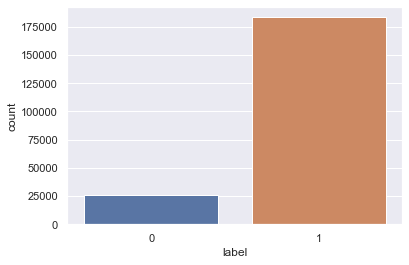

In [37]:
sns.countplot(x="label",data=df)
df["label"].value_counts()

Observations fro the plot:

A total of 26162 Individuals were not able to repay the loan

183431 individuals repayed the loan

The loan repayement rate was 88 %

Text(0.5, 0, 'AON')

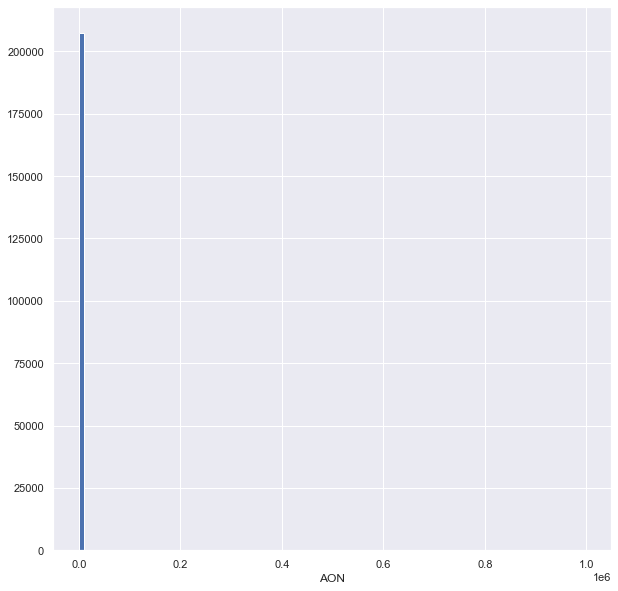

In [38]:
plt.figure(figsize=(10,10))
plt.hist(x="aon",data=df,bins=100)
plt.xlabel("AON")

Observations from the plot:

The average age per cellular network in days is ~ 8116.4 (22 years approx)

In [39]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Day
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,7,20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8,10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8,19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,22


In [40]:
df["daily_decr30"].min()

-93.0126666666667

In [41]:
df[df["daily_decr30"] == -93.0126666666667]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Day
43057,1,5756784457,1894.0,-93.012667,-93.012667,70540.47,70540.47,21.0,1.0,1539,1,0.0,1539.0,1539.0,1.25,1,0,1539,1539.0,1.25,1.0,0.0,1,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,2016-06-29,6,29


- Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

- The average of daily amount spent over a month cannot be negetive either it can be zero or some positive value 

- Replacing all the negetive values with median of data

In [42]:
df['daily_decr30'] = df['daily_decr30'].apply(lambda x : x if x > 0 else 0)

In [43]:
df['daily_decr30'].describe()

count    209593.000000
mean       5381.416791
std        9220.614929
min           0.000000
25%          42.440000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

In [44]:
df['daily_decr30'].median()

1469.17566666667

In [45]:
df["daily_decr30"] = df["daily_decr30"].replace(0,df['daily_decr30'].median())

In [46]:
df['daily_decr30'].describe()

count    209593.000000
mean       5423.355587
std        9199.359441
min           0.000667
25%          53.500000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

Text(0.5, 0, 'Daily Decrease 30')

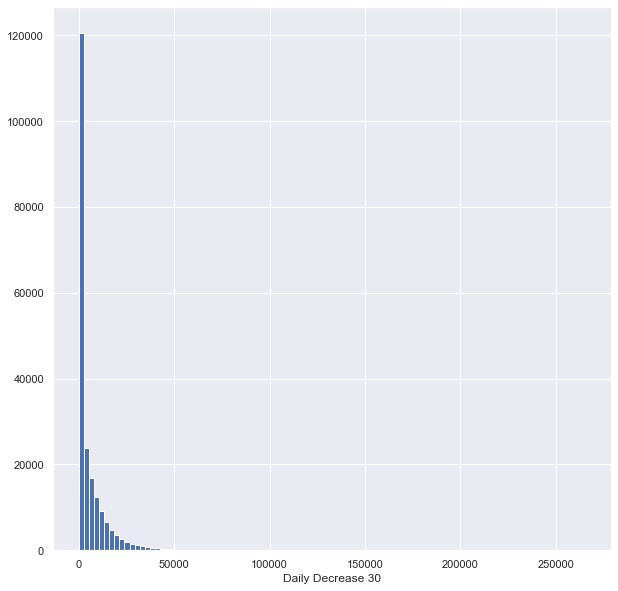

In [47]:
plt.figure(figsize=(10,10))
plt.hist(x="daily_decr30",data=df,bins=100)
plt.xlabel("Daily Decrease 30")

Observations from the plot:

The daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

5423.35 was the average amount spent by an individual per month

In [48]:
df["daily_decr90"].describe()

count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

In [49]:
df['daily_decr90'] = df['daily_decr90'].apply(lambda x : x if x > 0 else 0)

In [50]:
df["daily_decr90"] = df["daily_decr90"].replace(0,df['daily_decr90'].median())

In [51]:
df["daily_decr90"].describe()

count    209593.000000
mean       6124.768610
std       10898.074485
min           0.000667
25%          53.592000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

Text(0.5, 0, 'Daily Decrease 90')

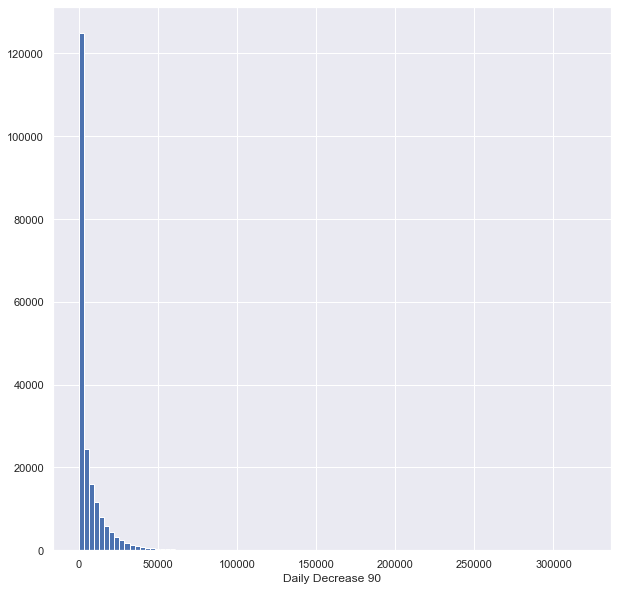

In [52]:
plt.figure(figsize=(10,10))
plt.hist(x="daily_decr90",data=df,bins=100)
plt.xlabel("Daily Decrease 90")

Observations from the plot:

The daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

6124.76 (Indonesian Rupiah) was the average amount spent by an individual over 3 months

In [53]:
df["rental30"].describe()

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

- rental 30 is the average main account balance of an individual over 30 days.


- It is not realistic to have Huge negetive values.


- We need to replace the negetive values with median of the column

In [54]:
df['rental30'] = df['rental30'].apply(lambda x : x if x > 0 else 0)

In [55]:
df["rental30"] = df["rental30"].replace(0,df['rental30'].median())

In [56]:
df['rental90'] = df['rental90'].apply(lambda x : x if x > 0 else 0)
df["rental90"] = df["rental90"].replace(0,df['rental90'].median())

The column "last_rech_date_da" means The number of days passed since the last recharge of the main account. We need to remove and replace the negative values from the data set as they don't make sense

In [57]:
df["last_rech_date_da"].describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

In [58]:
df['last_rech_date_da'] = df['last_rech_date_da'].apply(lambda x : x if x > 0 else 0)

- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)


- Replacing the negetive values in "medianmarechprebal30" with zeros and then replacing the zeros with median od the column

In [59]:
df['medianmarechprebal30'] = df['medianmarechprebal30'].apply(lambda x : x if x > 0 else 0)
df["medianmarechprebal30"] = df["medianmarechprebal30"].replace(0,df['medianmarechprebal30'].median())

- Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)


- Replacing the negetive values in "medianmarechprebal90" with zeros and then replacing the zeros with median od the column

In [60]:
df['medianmarechprebal90'] = df['medianmarechprebal90'].apply(lambda x : x if x > 0 else 0)
df["medianmarechprebal90"] = df["medianmarechprebal90"].replace(0,df['medianmarechprebal90'].median())

In [61]:
#date=df.groupby('pdate').mean()
#plt.figure(figsize=(18,12))
#date['aon'].plot(color="r")
#plt.title("age on cellular network in days")

Text(0.5, 1.0, 'daily_decr30')

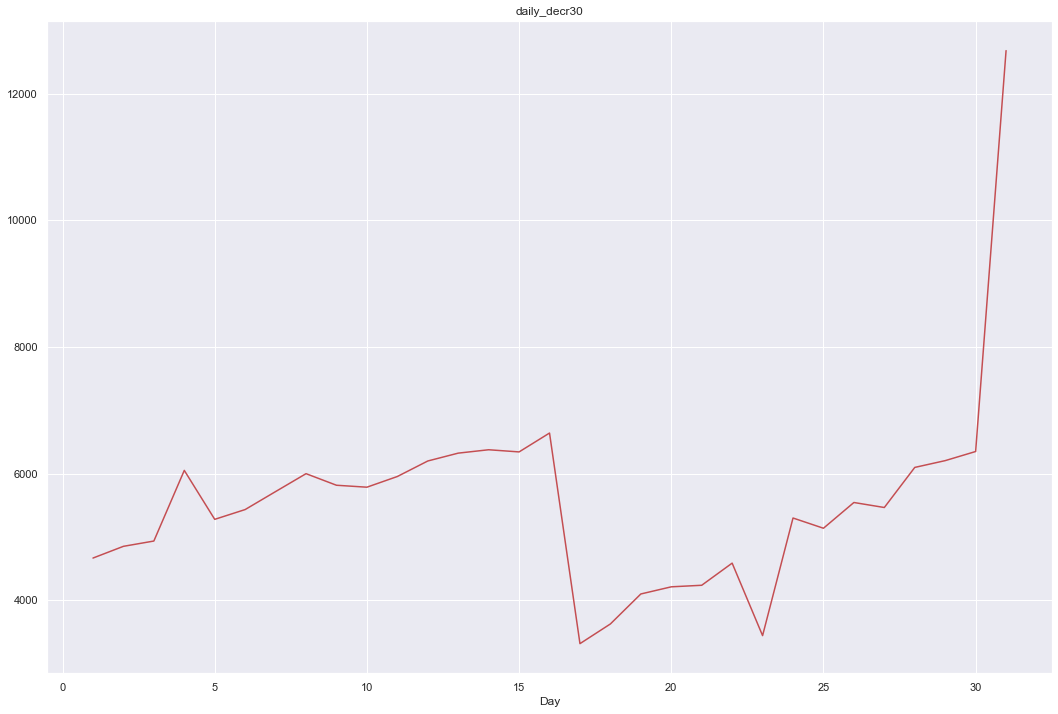

In [62]:
day=df.groupby('Day').mean()
plt.figure(figsize=(18,12))
day['daily_decr30'].plot(color="r")
plt.title("daily_decr30")

Observations from the plot:

Basically daily_decr30 is the daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

It is the average of the amount spent by an individual per month

The average amount spent by an individual  per month is ~ 5423.35(in Indonesian Rupiah)

From the above pattern we can observe that there is an exponential peak for the average amount spent during the last weeks of the month.

Text(0.5, 1.0, 'daily_decr90')

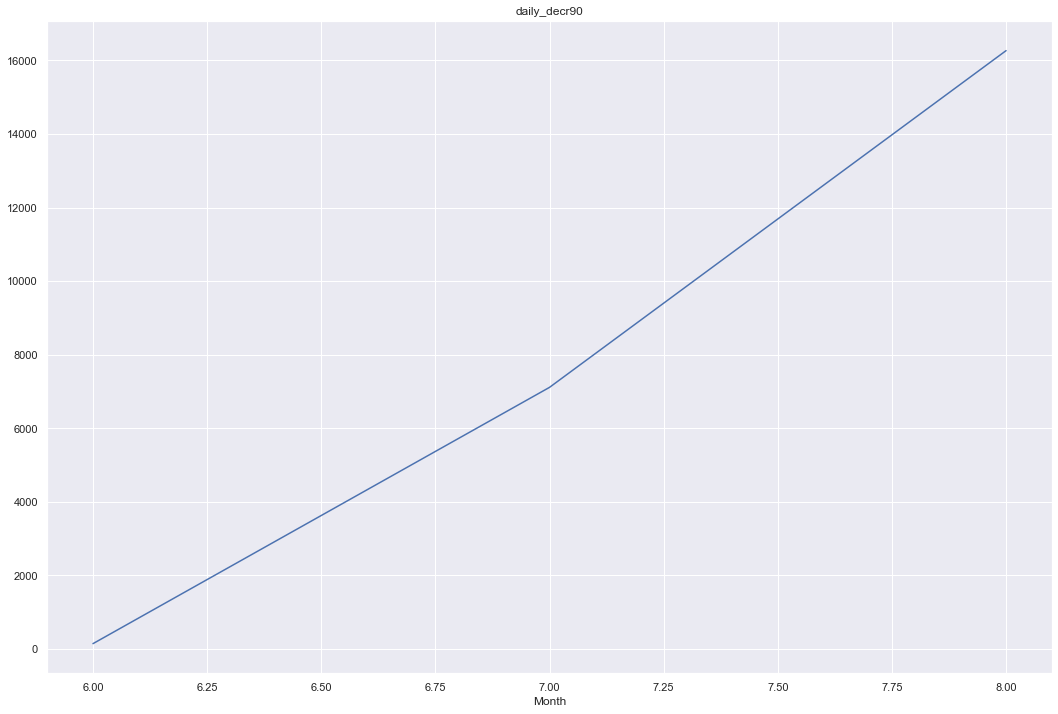

In [63]:
mon=df.groupby('Month').mean()
plt.figure(figsize=(18,12))
mon['daily_decr90'].plot(color="b")
plt.title("daily_decr90")

Observations from the plot:

daily_decr90 is the amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

So we can say that it is the average amount spent per individual over a period of 3 months

We have the data for the month's June, July and August.

From the above pattern we can clearly conclude that amount is at its peak value at the end of the 3 month period.

Text(0.5, 1.0, 'rental30')

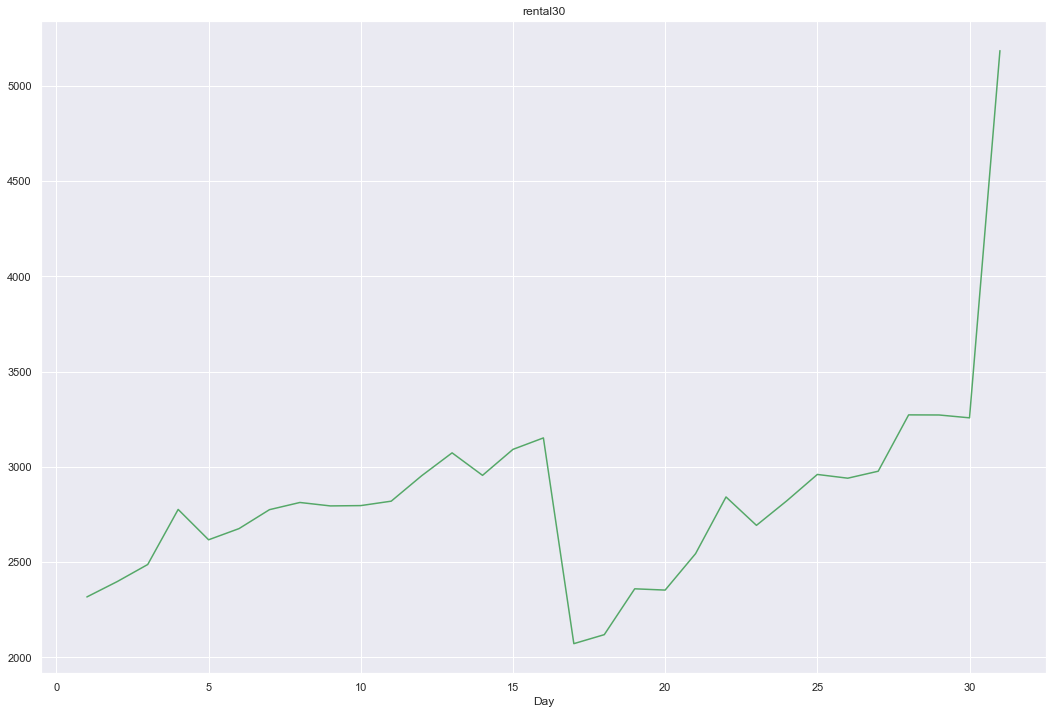

In [64]:
plt.figure(figsize=(18,12))
day['rental30'].plot(color="g")
plt.title("rental30")

Observations from the plot:

rental 30 is the Average main account balance over last 30 days

The average main account balance per individual is ~ 2772.19

From the above plot we can say that, in the begining of the month the main account balance is preety low

As the month end approaches the account balance has an exponential increase

Text(0.5, 0, 'Amount of last recharge of main account (in Indonesian Rupiah)')

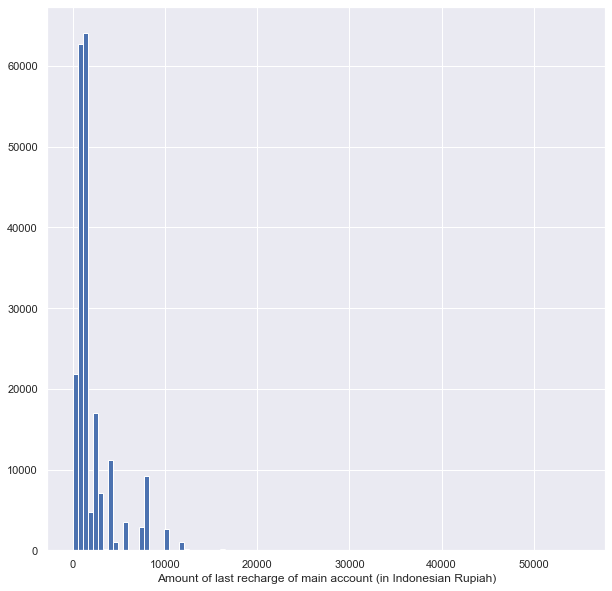

In [65]:
plt.figure(figsize=(10,10))
plt.hist(x="last_rech_amt_ma",data=df,bins=100)
plt.xlabel("Amount of last recharge of main account (in Indonesian Rupiah)")

Observations from the plot:

The average amount of last recharge of main account is ~ 2064.45 (in Indonesian Rupiah)

Text(0.5, 1.0, 'Number of times main account got recharged in last 30 days')

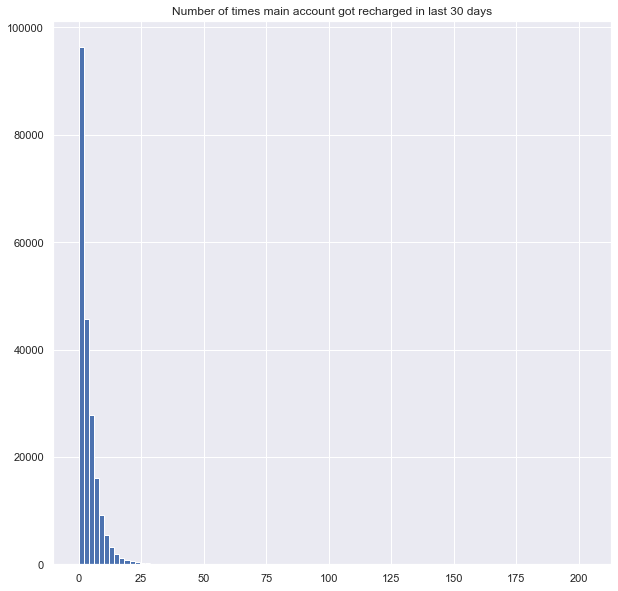

In [66]:
plt.figure(figsize=(10,10))
plt.hist(x="cnt_ma_rech30",data=df,bins=100)
plt.title("Number of times main account got recharged in last 30 days")

Observations from the plot:

cnt_ma_rech30 is the Number of times main account got recharged in last 30 days

On an average the main account was atleast recharged for 4 times a month

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)')

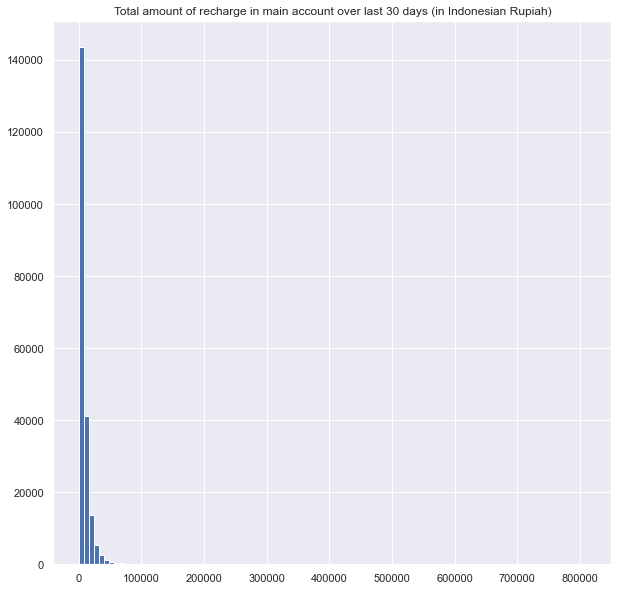

In [67]:
plt.figure(figsize=(10,10))
plt.hist(x="sumamnt_ma_rech30",data=df,bins=100)
plt.title("Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)")

Observations from the plot:

sumamnt_ma_rech30 is the Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

The highest total recharge in the main account over last 30 days was ~ 810096 (in Indonesian Rupiah)

The average total recharge in the main account over last 30 days was ~ 7704.5 (in Indonesian Rupiah)

Text(0.5, 1.0, 'Number of times main account got recharged in last 90 days')

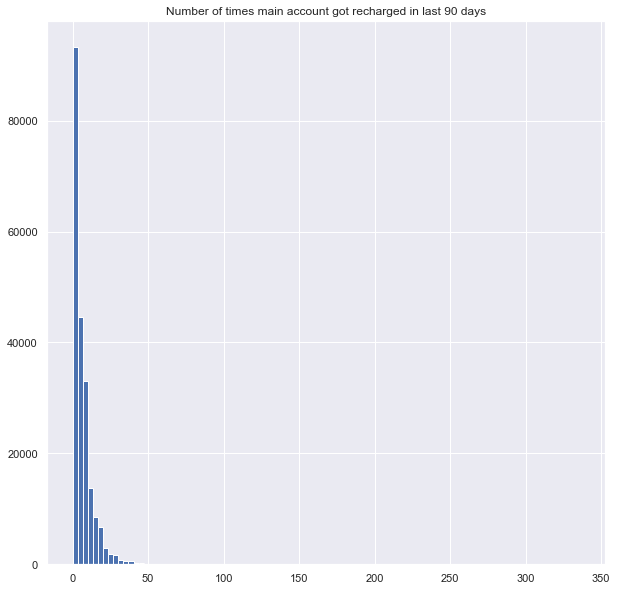

In [68]:
plt.figure(figsize=(10,10))
plt.hist(x="cnt_ma_rech90",data=df,bins=100)
plt.title("Number of times main account got recharged in last 90 days")

Observations from the plot:

cnt_ma_rech90 is the Number of times main account got recharged in last 90 days (over 3 months)

The highest Number of times main account got recharged in last 90 days was 336 times

The average Number of times main account got recharged in last 90 days was 6 times

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days')

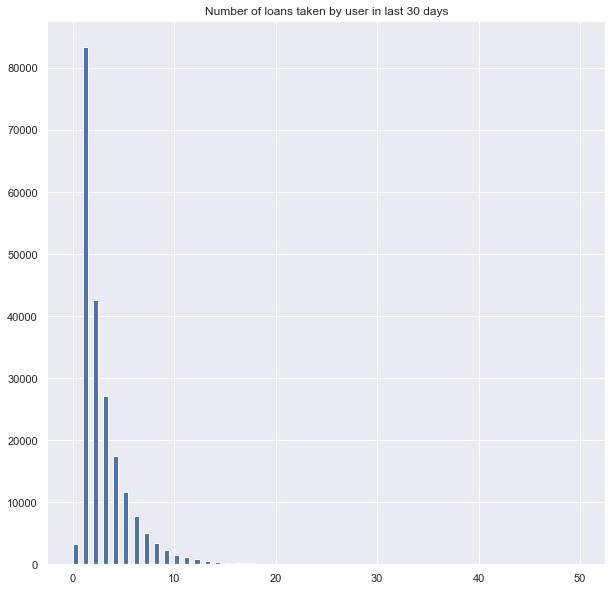

In [69]:
plt.figure(figsize=(10,10))
plt.hist(x="cnt_loans30",data=df,bins=100)
plt.title("Number of loans taken by user in last 30 days")

Observations from the plot:

cnt_loans30 is the Number of loans taken by user in last 30 days

On an average an individual took ~ 3 loans in a month(over 30 days) 

In [70]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Day
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,7,20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8,10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8,19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,33.90,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,22


In [71]:
df["maxamnt_loans30"].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

- There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively


- We need to replace all the values from maxamnt_loans30 which are greater than 12 

In [72]:
df['maxamnt_loans30'] = df['maxamnt_loans30'].apply(lambda x : x if x <= 12 else 0)

In [73]:
df["maxamnt_loans30"].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='count'>

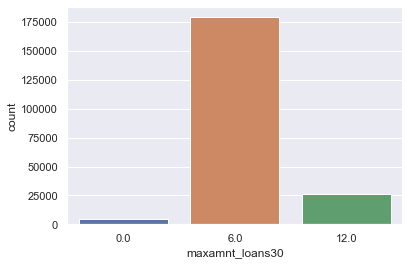

In [74]:
sns.countplot(x="maxamnt_loans30",data=df)

Observations from the plot:

maxamnt_loans30 is the maximum amount of loan taken by the user in last 30 days

User has two options 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

From the count plot above, we can say that most of the individuals have taken 5 Rs (in Indonesian Rupiah) loan so they have to repay 6 Rs. Very few Individuals have taken 12 Rs loan

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='count'>

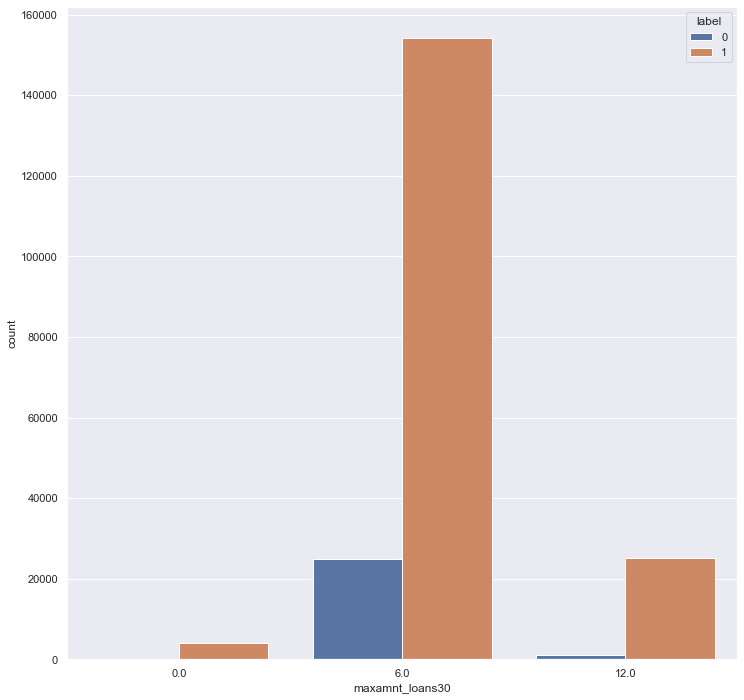

In [75]:
plt.figure(figsize=(12,12))
sns.countplot(x="maxamnt_loans30",hue="label",data=df)

Observations from the plot:

There is a high chance that individuals who have taken 5 Rs loan .i.e those individuals who have to repay Rs 6 have a high chance that they might not repay the loan 

Where else individuals who took 10 Rs loan .i.e who have to repay Rs 12 are repaying the loan

Text(0.5, 1.0, 'maximum amount of loan taken by the user in last 30 days')

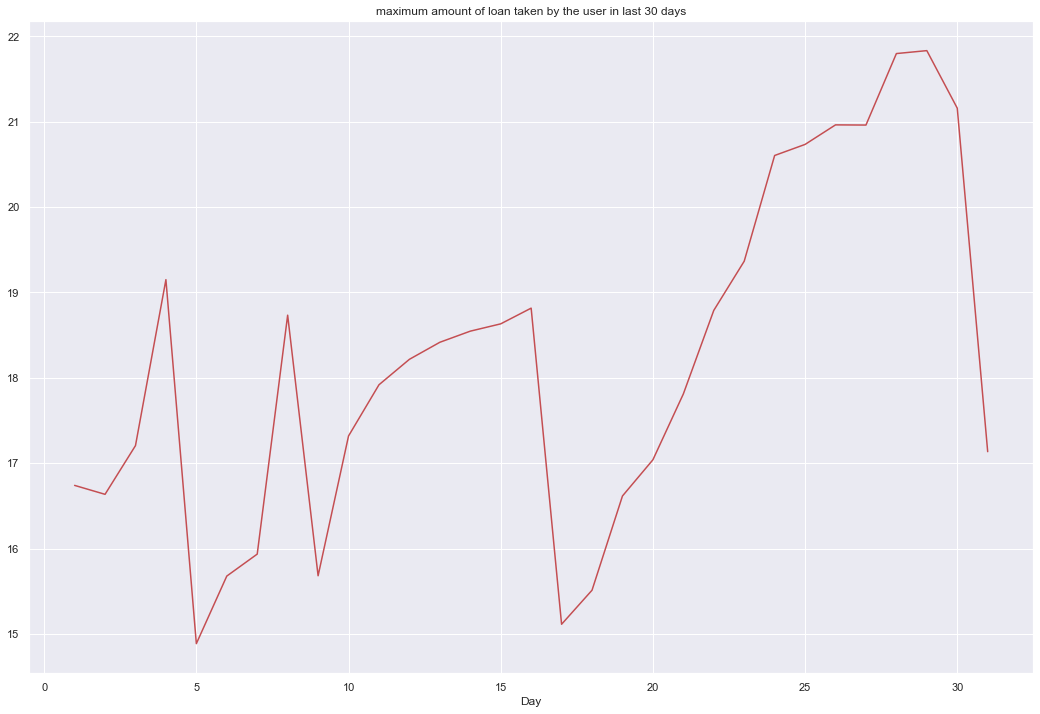

In [76]:
plt.figure(figsize=(18,12))
day['amnt_loans30'].plot(color="r")
plt.title("maximum amount of loan taken by the user in last 30 days")

Observations from the plot:

amnt_loans30 is the maximum amount of loan taken by the user in last 30 days(a month)

The average amount of loan taken by an individual is ~ 18

In the above plot we can observe that higher amounts of loans are been taken in the second half of the month

Highest amount of loan taken in past 30 days was 306

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

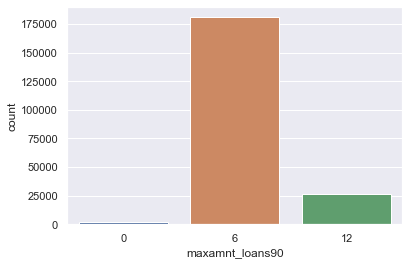

In [77]:
sns.countplot(x="maxamnt_loans90",data=df)

Obsrervations from the plot:

maxamnt_loans90 is the maximum amount of loan taken by the user in last 90 days (~ 3 months)

In those 90 days (~ 3 months) duration period most of the individuals have taken 5 Rs loan .i.e they have to repay 6 Rs. Very few individuals are taking 10 rs loan.

Text(0.5, 1.0, 'Average payback time in days over last 30 days')

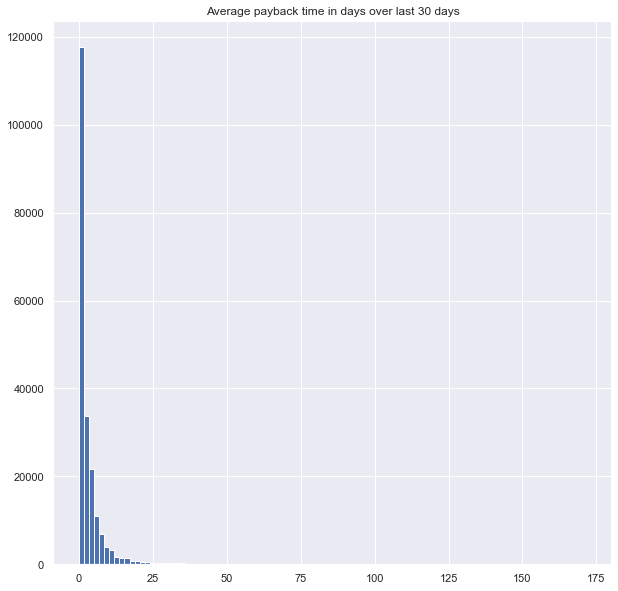

In [78]:
plt.figure(figsize=(10,10))
plt.hist(x="payback30",data=df,bins=100)
plt.title("Average payback time in days over last 30 days")

Observations from the plot:

payback30 is the Average payback time in days over last 30 days.

The average payback time in days is ~ 3 days 

Text(0.5, 1.0, 'Average payback time in days over last 90 days')

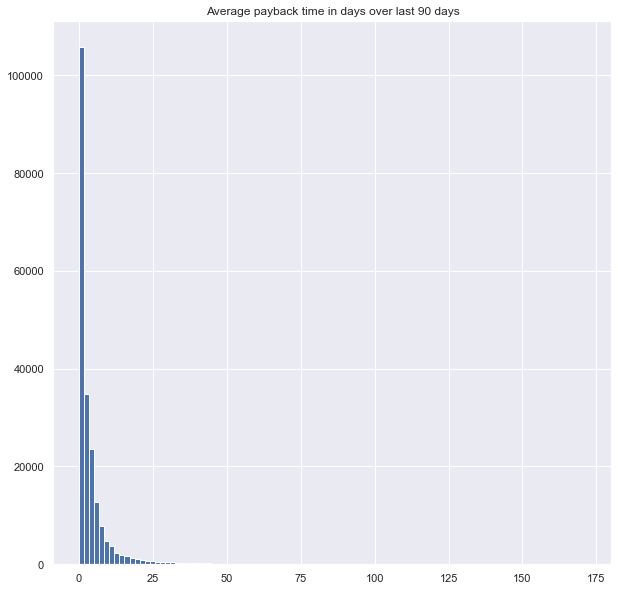

In [79]:
plt.figure(figsize=(10,10))
plt.hist(x="payback90",data=df,bins=100)
plt.title("Average payback time in days over last 90 days")

Observations from the plot:

payback90 is the Average payback time in days over last 90 days

The average payback time per individual for 90 days is ~ 4 days 

In [80]:
(df["last_rech_date_ma"] < 0).sum()

1315

- last_rech_date_ma is the Number of days till last recharge of main account


- We need to remove the negetive values from this "last_rech_date_ma" column

In [81]:
df['last_rech_date_ma'] = df['last_rech_date_ma'].apply(lambda x : x if x > 0 else 0)

In [82]:
(df["last_rech_date_ma"] < 0).sum()

0

In [83]:
df["last_rech_date_ma"] = df["last_rech_date_ma"].replace(0,df['last_rech_date_ma'].median())

In [84]:
df["last_rech_date_ma"].describe()

count    209593.000000
mean       3756.302548
std       53905.860521
min           1.000000
25%           2.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='label'>

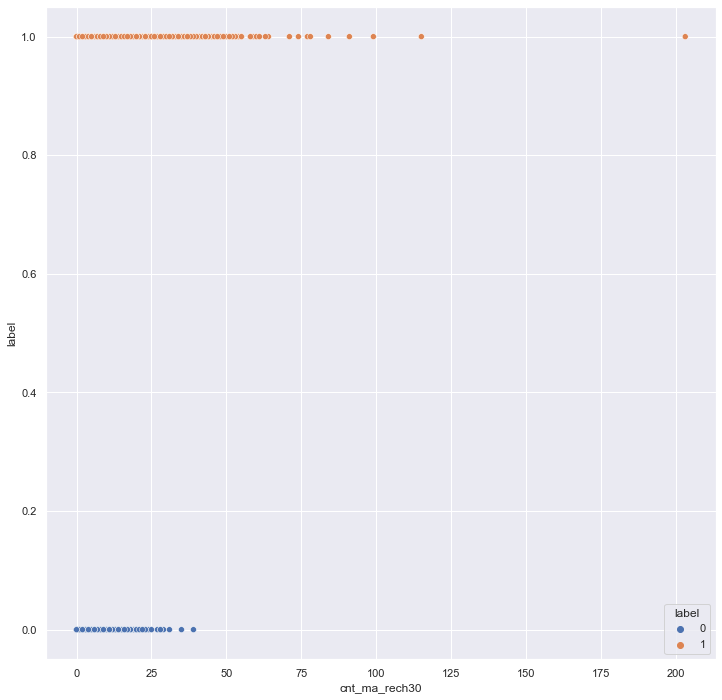

In [85]:
plt.figure(figsize=(12,12))
sns.scatterplot(x="cnt_ma_rech30",y="label",hue="label",data=df)

Observations from the plot:

- If the daily amount spent from the main account, averaged over the last 30 days (in Indonesian Rupiah) is greater than 40 (in Indonesian Rupiah) then there is a high possibility that the individual will repay the loan taken.

<AxesSubplot:xlabel='Month', ylabel='count'>

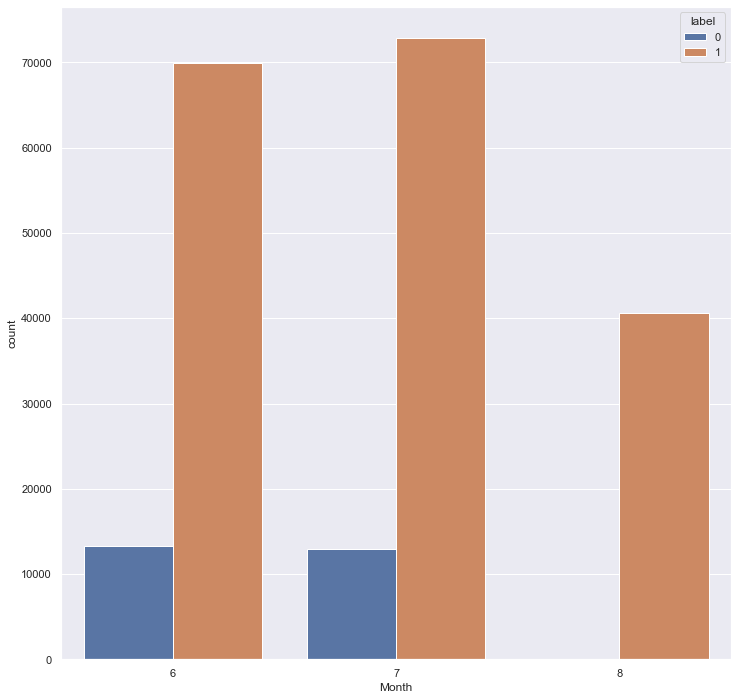

In [86]:
plt.figure(figsize=(12,12))
sns.countplot(x="Month",hue="label",data=df)

Observations from the plot:

- We have the data for the months June, July, and August and we can conclude that the highest number of unpaid loans were in the month of June 


- No unpaid loans in the month of august

### Correlation

In [87]:
cor = df.corr()

<AxesSubplot:>

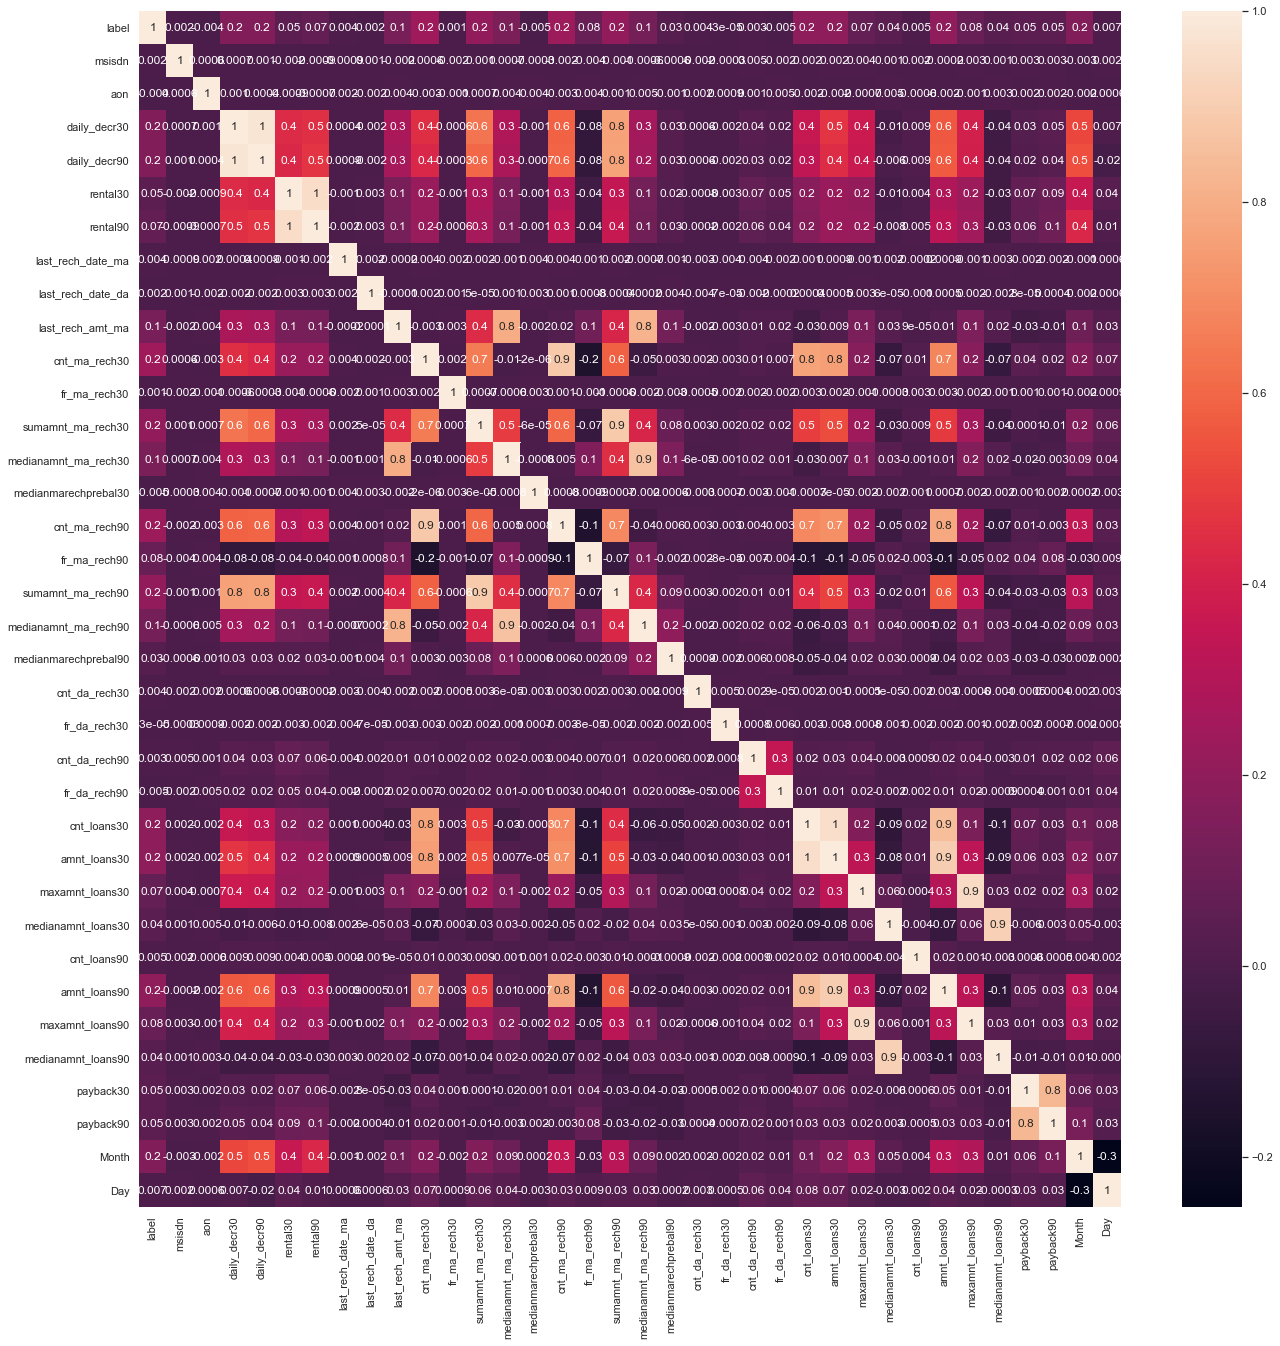

In [88]:
plt.figure(figsize=(22,22))
sns.heatmap(data=cor,annot=True,fmt='.1g')

In [89]:
cor["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.158490
daily_decr90            0.157658
Month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
maxamnt_loans30         0.072203
rental90                0.068048
rental30                0.050051
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianamnt_loans90      0.035747
medianmarechprebal90    0.028398
Day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003724
cnt_da_rech90           0.002999
msisdn                  0.001945
last_rech_

# Data Cleaning

In [90]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
Month                   0
Day                     0
dtype: int64

No null values in the data set

## Outliers

In [91]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.05)
    Q3 = df[cname].quantile(0.95)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [92]:
outliers("aon")

The first quartile : 103.0 for aon
The third quartile : 1749.0 for aon
The IQR : 730.0 for aon
The left outlier : -2366.0 for aon
The Right outlier : 4218.0 for aon
Left Outliers : 0
Right Outliers : 2089


There are outliers in age on cellular network in days

In [93]:
outliers("daily_decr30")

The first quartile : 5.83333333333333 for daily_decr30
The third quartile : 22577.499999999985 for daily_decr30
The IQR : 7190.5 for daily_decr30
The left outlier : -33851.66666666664 for daily_decr30
The Right outlier : 56434.99999999996 for daily_decr30
Left Outliers : 0
Right Outliers : 801


There are outliers in daily_decr30

In [94]:
outliers("daily_decr90")

The first quartile : 5.903733333333336 for daily_decr90
The third quartile : 26244.257999999994 for daily_decr90
The IQR : 7749.19800000001 for daily_decr90
The left outlier : -39351.62766666666 for daily_decr90
The Right outlier : 65601.78939999998 for daily_decr90
Left Outliers : 0
Right Outliers : 880


There are outliers in daily_decr90

In [95]:
outliers("rental30")

The first quartile : 57.0 for rental30
The third quartile : 11166.419999999998 for rental30
The IQR : 2941.2 for rental30
The left outlier : -16607.129999999997 for rental30
The Right outlier : 27830.549999999996 for rental30
Left Outliers : 0
Right Outliers : 543


There are some outliers in rental 30

In [96]:
outliers("rental90")

The first quartile : 60.0 for rental90
The third quartile : 14642.973999999995 for rental90
The IQR : 3725.27 for rental90
The left outlier : -21814.460999999992 for rental90
The Right outlier : 36517.43499999998 for rental90
Left Outliers : 0
Right Outliers : 637


There are some outliers in rental 90

In [97]:
outliers("last_rech_date_ma")

The first quartile : 1.0 for last_rech_date_ma
The third quartile : 25.0 for last_rech_date_ma
The IQR : 5.0 for last_rech_date_ma
The left outlier : -35.0 for last_rech_date_ma
The Right outlier : 61.0 for last_rech_date_ma
Left Outliers : 0
Right Outliers : 1817


There are outliers in last_rech_date_ma

In [98]:
outliers("last_rech_date_da")

The first quartile : 0.0 for last_rech_date_da
The third quartile : 0.0 for last_rech_date_da
The IQR : 0.0 for last_rech_date_da
The left outlier : 0.0 for last_rech_date_da
The Right outlier : 0.0 for last_rech_date_da
Left Outliers : 0
Right Outliers : 6718


There are outliers in last_rech_date_da

In [99]:
outliers("last_rech_amt_ma")

The first quartile : 0.0 for last_rech_amt_ma
The third quartile : 8000.0 for last_rech_amt_ma
The IQR : 1539.0 for last_rech_amt_ma
The left outlier : -12000.0 for last_rech_amt_ma
The Right outlier : 20000.0 for last_rech_amt_ma
Left Outliers : 0
Right Outliers : 65


There are some outliers in last_rech_amt_ma

In [100]:
outliers("cnt_ma_rech30")

The first quartile : 0.0 for cnt_ma_rech30
The third quartile : 12.0 for cnt_ma_rech30
The IQR : 4.0 for cnt_ma_rech30
The left outlier : -18.0 for cnt_ma_rech30
The Right outlier : 30.0 for cnt_ma_rech30
Left Outliers : 0
Right Outliers : 340


There are some outliers in cnt_ma_rech30

In [101]:
outliers("fr_ma_rech30")

The first quartile : 0.0 for fr_ma_rech30
The third quartile : 16.0 for fr_ma_rech30
The IQR : 6.0 for fr_ma_rech30
The left outlier : -24.0 for fr_ma_rech30
The Right outlier : 40.0 for fr_ma_rech30
Left Outliers : 0
Right Outliers : 1047


There are some outliers in fr_ma_rech30

In [102]:
outliers("sumamnt_ma_rech30")

The first quartile : 0.0 for sumamnt_ma_rech30
The third quartile : 24837.0 for sumamnt_ma_rech30
The IQR : 8470.0 for sumamnt_ma_rech30
The left outlier : -37255.5 for sumamnt_ma_rech30
The Right outlier : 62092.5 for sumamnt_ma_rech30
Left Outliers : 0
Right Outliers : 890


There are some outliers in sumamnt_ma_rech30

In [103]:
outliers("medianamnt_ma_rech30")

The first quartile : 0.0 for medianamnt_ma_rech30
The third quartile : 7526.0 for medianamnt_ma_rech30
The IQR : 1154.0 for medianamnt_ma_rech30
The left outlier : -11289.0 for medianamnt_ma_rech30
The Right outlier : 18815.0 for medianamnt_ma_rech30
Left Outliers : 0
Right Outliers : 52


There are some outliers in medianamnt_ma_rech30

In [104]:
outliers("medianmarechprebal30")

The first quartile : 5.79999999999995 for medianmarechprebal30
The third quartile : 402.4 for medianmarechprebal30
The IQR : 59.0 for medianmarechprebal30
The left outlier : -589.1000000000001 for medianmarechprebal30
The Right outlier : 997.3000000000001 for medianmarechprebal30
Left Outliers : 0
Right Outliers : 2744


There are some outliers in medianmarechprebal30

In [105]:
outliers("cnt_ma_rech90")

The first quartile : 0.0 for cnt_ma_rech90
The third quartile : 20.0 for cnt_ma_rech90
The IQR : 6.0 for cnt_ma_rech90
The left outlier : -30.0 for cnt_ma_rech90
The Right outlier : 50.0 for cnt_ma_rech90
Left Outliers : 0
Right Outliers : 416


There are some outliers in cnt_ma_rech90

In [106]:
outliers("fr_ma_rech90")

The first quartile : 0.0 for fr_ma_rech90
The third quartile : 37.0 for fr_ma_rech90
The IQR : 8.0 for fr_ma_rech90
The left outlier : -55.5 for fr_ma_rech90
The Right outlier : 92.5 for fr_ma_rech90
Left Outliers : 0
Right Outliers : 0


No outliers in fr_ma_rech90

In [107]:
outliers("sumamnt_ma_rech90")

The first quartile : 0.0 for sumamnt_ma_rech90
The third quartile : 41780.99999999997 for sumamnt_ma_rech90
The IQR : 13683.0 for sumamnt_ma_rech90
The left outlier : -62671.499999999956 for sumamnt_ma_rech90
The Right outlier : 104452.49999999993 for sumamnt_ma_rech90
Left Outliers : 0
Right Outliers : 898


Some outliers in sumamnt_ma_rech90

In [108]:
outliers("medianamnt_ma_rech90")

The first quartile : 0.0 for medianamnt_ma_rech90
The third quartile : 7526.0 for medianamnt_ma_rech90
The IQR : 1151.0 for medianamnt_ma_rech90
The left outlier : -11289.0 for medianamnt_ma_rech90
The Right outlier : 18815.0 for medianamnt_ma_rech90
Left Outliers : 0
Right Outliers : 55


Some outliers in medianamnt_ma_rech90

In [109]:
outliers("medianmarechprebal90")

The first quartile : 6.529999999999882 for medianmarechprebal90
The third quartile : 345.7739999999999 for medianmarechprebal90
The IQR : 55.8100000000002 for medianmarechprebal90
The left outlier : -502.3360000000002 for medianmarechprebal90
The Right outlier : 854.6399999999999 for medianmarechprebal90
Left Outliers : 0
Right Outliers : 2051


There are outliers in medianmarechprebal90

In [110]:
outliers("cnt_da_rech30")

The first quartile : 0.0 for cnt_da_rech30
The third quartile : 0.0 for cnt_da_rech30
The IQR : 0.0 for cnt_da_rech30
The left outlier : 0.0 for cnt_da_rech30
The Right outlier : 0.0 for cnt_da_rech30
Left Outliers : 0
Right Outliers : 4114


There are outliers in cnt_da_rech30

In [111]:
outliers("fr_da_rech30")

The first quartile : 0.0 for fr_da_rech30
The third quartile : 0.0 for fr_da_rech30
The IQR : 0.0 for fr_da_rech30
The left outlier : 0.0 for fr_da_rech30
The Right outlier : 0.0 for fr_da_rech30
Left Outliers : 0
Right Outliers : 1579


There are outliers in fr_da_rech30

In [112]:
outliers("cnt_da_rech90")

The first quartile : 0.0 for cnt_da_rech90
The third quartile : 0.0 for cnt_da_rech90
The IQR : 0.0 for cnt_da_rech90
The left outlier : 0.0 for cnt_da_rech90
The Right outlier : 0.0 for cnt_da_rech90
Left Outliers : 0
Right Outliers : 5367


There are outliers in cnt_da_rech90

In [113]:
outliers("fr_da_rech90")

The first quartile : 0.0 for fr_da_rech90
The third quartile : 0.0 for fr_da_rech90
The IQR : 0.0 for fr_da_rech90
The left outlier : 0.0 for fr_da_rech90
The Right outlier : 0.0 for fr_da_rech90
Left Outliers : 0
Right Outliers : 865


There are outliers in fr_da_rech90

In [114]:
outliers("cnt_loans30")

The first quartile : 1.0 for cnt_loans30
The third quartile : 8.0 for cnt_loans30
The IQR : 3.0 for cnt_loans30
The left outlier : -9.5 for cnt_loans30
The Right outlier : 18.5 for cnt_loans30
Left Outliers : 0
Right Outliers : 362


There are outliers in cnt_loans30

In [115]:
outliers("amnt_loans30")

The first quartile : 6.0 for amnt_loans30
The third quartile : 48.0 for amnt_loans30
The IQR : 18.0 for amnt_loans30
The left outlier : -57.0 for amnt_loans30
The Right outlier : 111.0 for amnt_loans30
Left Outliers : 0
Right Outliers : 727


There are outliers in amnt_loans30

In [116]:
outliers("maxamnt_loans30")

The first quartile : 6.0 for maxamnt_loans30
The third quartile : 12.0 for maxamnt_loans30
The IQR : 0.0 for maxamnt_loans30
The left outlier : -3.0 for maxamnt_loans30
The Right outlier : 21.0 for maxamnt_loans30
Left Outliers : 0
Right Outliers : 0


No outliers in maxamnt_loans30

In [117]:
outliers("medianamnt_loans30")

The first quartile : 0.0 for medianamnt_loans30
The third quartile : 0.5 for medianamnt_loans30
The IQR : 0.0 for medianamnt_loans30
The left outlier : -0.75 for medianamnt_loans30
The Right outlier : 1.25 for medianamnt_loans30
Left Outliers : 0
Right Outliers : 461


Some outliers in medianamnt_loans30

In [118]:
outliers("cnt_loans90")

The first quartile : 1.0 for cnt_loans90
The third quartile : 12.0 for cnt_loans90
The IQR : 4.0 for cnt_loans90
The left outlier : -15.5 for cnt_loans90
The Right outlier : 28.5 for cnt_loans90
Left Outliers : 0
Right Outliers : 1449


In [119]:
outliers("amnt_loans90")

The first quartile : 6.0 for amnt_loans90
The third quartile : 72.0 for amnt_loans90
The IQR : 24.0 for amnt_loans90
The left outlier : -93.0 for amnt_loans90
The Right outlier : 171.0 for amnt_loans90
Left Outliers : 0
Right Outliers : 673


Some outliers in amnt_loans90

In [120]:
outliers("maxamnt_loans90")

The first quartile : 6.0 for maxamnt_loans90
The third quartile : 12.0 for maxamnt_loans90
The IQR : 0.0 for maxamnt_loans90
The left outlier : -3.0 for maxamnt_loans90
The Right outlier : 21.0 for maxamnt_loans90
Left Outliers : 0
Right Outliers : 0


No outliers in maxamnt_loans90

In [121]:
outliers("medianamnt_loans90")

The first quartile : 0.0 for medianamnt_loans90
The third quartile : 0.5 for medianamnt_loans90
The IQR : 0.0 for medianamnt_loans90
The left outlier : -0.75 for medianamnt_loans90
The Right outlier : 1.25 for medianamnt_loans90
Left Outliers : 0
Right Outliers : 329


Some outliers in medianamnt_loans90

In [122]:
outliers("payback30")

The first quartile : 0.0 for payback30
The third quartile : 13.0 for payback30
The IQR : 3.75 for payback30
The left outlier : -19.5 for payback30
The Right outlier : 32.5 for payback30
Left Outliers : 0
Right Outliers : 2724


There are outliers in payback30

In [123]:
outliers("payback90")

The first quartile : 0.0 for payback90
The third quartile : 17.0 for payback90
The IQR : 4.5 for payback90
The left outlier : -25.5 for payback90
The Right outlier : 42.5 for payback90
Left Outliers : 0
Right Outliers : 2696


There are outliers in payback90

### Most of the columns are having outliers we need to handle them

## Removing Outliers

#### Z score technique

In [124]:
from scipy.stats import zscore

Dropping the "pdate" column from the dataframe

In [125]:
df = df.drop("pdate",axis=1)

In [126]:
y = df["label"]

In [127]:
df = df.drop("label",axis=1)

In [128]:
df.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,33.90,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [129]:
z = np.abs(zscore(df))

In [130]:
threshhold = 3
print(np.where(z > 3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [131]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(209593, 35)
(160475, 35)


### Percentage data loss 

In [132]:
loss = (209593-160475)/209593*100

In [133]:
print("The data loss is ",loss," %")

The data loss is  23.434942960881326  %


### We cannot go ahead with z score technique as there is 23 % data loss. the data loss is very high

In [134]:
df.shape

(209593, 35)

In [135]:
df.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,33.90,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


### Lets create a function to replace the outliers with median values of data

In [136]:
def replace_outliers(col):
    
    q = df[col].quantile(0.95)
    df[col] = df[col].apply(lambda x : x if x <= q else 0)
    df[col] = df[col].replace(0,df[col].median())

In [137]:
replace_outliers("aon")

In [138]:
outliers("aon")

The first quartile : 103.0 for aon
The third quartile : 1411.0 for aon
The IQR : 617.0 for aon
The left outlier : -1859.0 for aon
The Right outlier : 3373.0 for aon
Left Outliers : 0
Right Outliers : 0


In [139]:
replace_outliers("daily_decr30")

In [140]:
outliers("daily_decr30")

The first quartile : 5.83333333333333 for daily_decr30
The third quartile : 15590.405999999994 for daily_decr30
The IQR : 5562.56666666667 for daily_decr30
The left outlier : -23371.025666666657 for daily_decr30
The Right outlier : 38967.264999999985 for daily_decr30
Left Outliers : 0
Right Outliers : 0


In [141]:
replace_outliers("daily_decr90")

In [142]:
outliers("daily_decr90")

The first quartile : 5.903733333333336 for daily_decr90
The third quartile : 17785.415999999936 for daily_decr90
The IQR : 5911.76800000001 for daily_decr90
The left outlier : -26663.364666666574 for daily_decr90
The Right outlier : 44454.68439999984 for daily_decr90
Left Outliers : 0
Right Outliers : 0


In [143]:
replace_outliers("rental30")

In [144]:
outliers("rental30")

The first quartile : 57.0 for rental30
The third quartile : 7321.6939999999995 for rental30
The IQR : 2218.51 for rental30
The left outlier : -10840.041 for rental30
The Right outlier : 18218.735 for rental30
Left Outliers : 0
Right Outliers : 0


In [145]:
replace_outliers("rental90")

In [146]:
outliers("rental90")

The first quartile : 60.0 for rental90
The third quartile : 9506.843999999992 for rental90
The IQR : 2878.38999999999 for rental90
The left outlier : -14110.265999999989 for rental90
The Right outlier : 23677.10999999998 for rental90
Left Outliers : 0
Right Outliers : 0


In [147]:
replace_outliers("last_rech_date_ma")

In [148]:
outliers("last_rech_date_ma")

The first quartile : 1.0 for last_rech_date_ma
The third quartile : 15.0 for last_rech_date_ma
The IQR : 4.0 for last_rech_date_ma
The left outlier : -20.0 for last_rech_date_ma
The Right outlier : 36.0 for last_rech_date_ma
Left Outliers : 0
Right Outliers : 0


In [149]:
replace_outliers("cnt_ma_rech30")

In [150]:
outliers("cnt_ma_rech30")

The first quartile : 1.0 for cnt_ma_rech30
The third quartile : 9.0 for cnt_ma_rech30
The IQR : 3.0 for cnt_ma_rech30
The left outlier : -11.0 for cnt_ma_rech30
The Right outlier : 21.0 for cnt_ma_rech30
Left Outliers : 0
Right Outliers : 0


In [151]:
replace_outliers("last_rech_amt_ma")

In [152]:
outliers("last_rech_amt_ma")

The first quartile : 770.0 for last_rech_amt_ma
The third quartile : 7526.0 for last_rech_amt_ma
The IQR : 1151.0 for last_rech_amt_ma
The left outlier : -9364.0 for last_rech_amt_ma
The Right outlier : 17660.0 for last_rech_amt_ma
Left Outliers : 0
Right Outliers : 0


In [153]:
replace_outliers("fr_ma_rech30")

In [154]:
outliers("fr_ma_rech30")

The first quartile : 1.0 for fr_ma_rech30
The third quartile : 12.0 for fr_ma_rech30
The IQR : 4.0 for fr_ma_rech30
The left outlier : -15.5 for fr_ma_rech30
The Right outlier : 28.5 for fr_ma_rech30
Left Outliers : 0
Right Outliers : 0


In [155]:
replace_outliers("sumamnt_ma_rech30")

In [156]:
outliers("sumamnt_ma_rech30")

The first quartile : 773.0 for sumamnt_ma_rech30
The third quartile : 17892.399999999994 for sumamnt_ma_rech30
The IQR : 5413.0 for sumamnt_ma_rech30
The left outlier : -24906.09999999999 for sumamnt_ma_rech30
The Right outlier : 43571.499999999985 for sumamnt_ma_rech30
Left Outliers : 0
Right Outliers : 0


In [157]:
replace_outliers("medianamnt_ma_rech30")

In [158]:
outliers("medianamnt_ma_rech30")

The first quartile : 770.0 for medianamnt_ma_rech30
The third quartile : 4048.0 for medianamnt_ma_rech30
The IQR : 770.0 for medianamnt_ma_rech30
The left outlier : -4147.0 for medianamnt_ma_rech30
The Right outlier : 8965.0 for medianamnt_ma_rech30
Left Outliers : 0
Right Outliers : 0


In [159]:
replace_outliers("medianmarechprebal30")

In [160]:
outliers("medianmarechprebal30")

The first quartile : 5.79999999999995 for medianmarechprebal30
The third quartile : 237.43199999999956 for medianmarechprebal30
The IQR : 45.5 for medianmarechprebal30
The left outlier : -341.64799999999946 for medianmarechprebal30
The Right outlier : 584.879999999999 for medianmarechprebal30
Left Outliers : 0
Right Outliers : 0


In [161]:
replace_outliers("cnt_ma_rech90")

In [162]:
outliers("cnt_ma_rech90")

The first quartile : 1.0 for cnt_ma_rech90
The third quartile : 15.0 for cnt_ma_rech90
The IQR : 4.0 for cnt_ma_rech90
The left outlier : -20.0 for cnt_ma_rech90
The Right outlier : 36.0 for cnt_ma_rech90
Left Outliers : 0
Right Outliers : 0


In [163]:
replace_outliers("sumamnt_ma_rech90")

In [164]:
outliers("sumamnt_ma_rech90")

The first quartile : 947.0 for sumamnt_ma_rech90
The third quartile : 29627.0 for sumamnt_ma_rech90
The IQR : 9536.0 for sumamnt_ma_rech90
The left outlier : -42073.0 for sumamnt_ma_rech90
The Right outlier : 72647.0 for sumamnt_ma_rech90
Left Outliers : 0
Right Outliers : 0


In [165]:
replace_outliers("medianamnt_ma_rech90")

In [166]:
outliers("medianamnt_ma_rech90")

The first quartile : 770.0 for medianamnt_ma_rech90
The third quartile : 4048.0 for medianamnt_ma_rech90
The IQR : 774.0 for medianamnt_ma_rech90
The left outlier : -4147.0 for medianamnt_ma_rech90
The Right outlier : 8965.0 for medianamnt_ma_rech90
Left Outliers : 0
Right Outliers : 0


In [167]:
replace_outliers("medianmarechprebal90")

In [168]:
outliers("medianmarechprebal90")

The first quartile : 6.529999999999882 for medianmarechprebal90
The third quartile : 203.0 for medianmarechprebal90
The IQR : 44.099999999999994 for medianmarechprebal90
The left outlier : -288.1750000000003 for medianmarechprebal90
The Right outlier : 497.70500000000015 for medianmarechprebal90
Left Outliers : 0
Right Outliers : 0


In [169]:
replace_outliers("cnt_loans30")

In [170]:
outliers("cnt_loans30")

The first quartile : 1.0 for cnt_loans30
The third quartile : 6.0 for cnt_loans30
The IQR : 2.0 for cnt_loans30
The left outlier : -6.5 for cnt_loans30
The Right outlier : 13.5 for cnt_loans30
Left Outliers : 0
Right Outliers : 0


In [171]:
replace_outliers("amnt_loans30")

In [172]:
outliers("amnt_loans30")

The first quartile : 6.0 for amnt_loans30
The third quartile : 36.0 for amnt_loans30
The IQR : 12.0 for amnt_loans30
The left outlier : -39.0 for amnt_loans30
The Right outlier : 81.0 for amnt_loans30
Left Outliers : 0
Right Outliers : 0


In [173]:
replace_outliers("cnt_loans90")

In [174]:
outliers("cnt_loans90")

The first quartile : 1.0 for cnt_loans90
The third quartile : 9.0 for cnt_loans90
The IQR : 3.0 for cnt_loans90
The left outlier : -11.0 for cnt_loans90
The Right outlier : 21.0 for cnt_loans90
Left Outliers : 0
Right Outliers : 0


In [175]:
replace_outliers("amnt_loans90")

In [176]:
outliers("amnt_loans90")

The first quartile : 6.0 for amnt_loans90
The third quartile : 54.0 for amnt_loans90
The IQR : 18.0 for amnt_loans90
The left outlier : -66.0 for amnt_loans90
The Right outlier : 126.0 for amnt_loans90
Left Outliers : 0
Right Outliers : 0


In [177]:
df.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,1.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,1.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,1.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,5577370781,241.0,21.228000,21.228000,159.42,159.42,3.0,0.0,947,2,1.0,4025.0,1158.5,33.90,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


## Checking Skewness of data

In [178]:
df.skew()

msisdn                   0.018124
aon                      0.791593
daily_decr30             1.631028
daily_decr90             1.733318
rental30                 1.793629
rental90                 1.845694
last_rech_date_ma        2.003807
last_rech_date_da       14.814857
last_rech_amt_ma         2.282330
cnt_ma_rech30            1.292975
fr_ma_rech30             1.635904
sumamnt_ma_rech30        1.412210
medianamnt_ma_rech30     2.612277
medianmarechprebal30     2.429477
cnt_ma_rech90            1.321299
fr_ma_rech90             2.285423
sumamnt_ma_rech90        1.456577
medianamnt_ma_rech90     2.580062
medianmarechprebal90     2.315053
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              1.355160
amnt_loans30             1.307195
maxamnt_loans30          1.241879
medianamnt_loans30       4.551043
cnt_loans90              1.517707
amnt_loans90             1.478278
maxamnt_loans9

### Most of the data is skewed we need to reduce the skewness


In [179]:
def QQ_plot(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

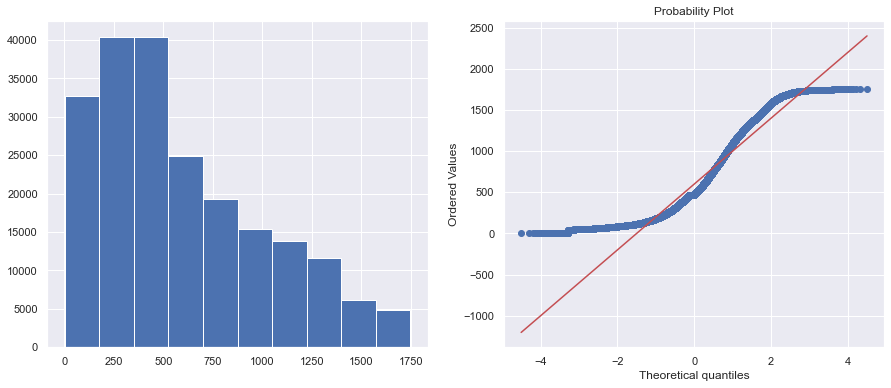

In [180]:
QQ_plot(df,"aon")

##### Log Transformation

In [181]:
def logt(col):
    df[col] = np.log(df[col]+1)
    return df[col].skew()

In [182]:
logt("aon")

-0.5350525673582466

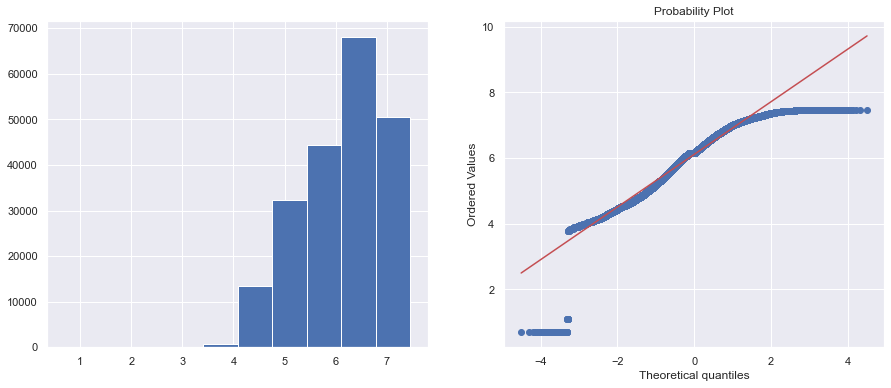

In [183]:
QQ_plot(df,"aon")

Skewness has been reduced in the aon column

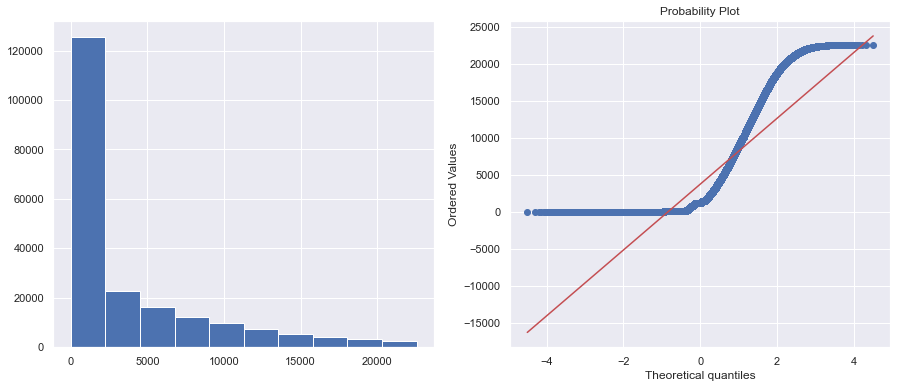

In [184]:
QQ_plot(df,"daily_decr30")

In [185]:
logt("daily_decr30")

-0.48343338895530535

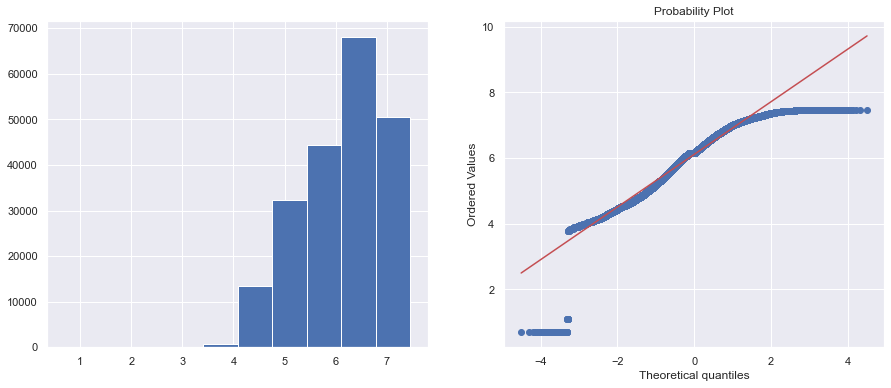

In [186]:
QQ_plot(df,"aon")

Skewness has been reduced in Daily Decr 30

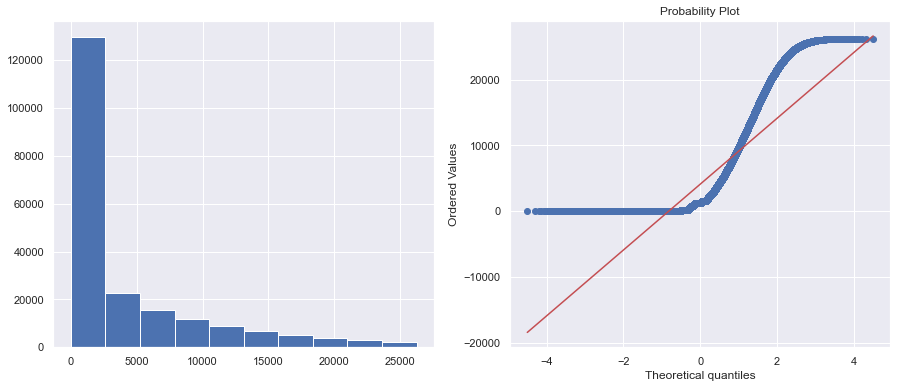

In [187]:
QQ_plot(df,"daily_decr90")

In [188]:
df["daily_decr90"].skew()

1.7333177889180857

In [189]:
logt("daily_decr90")

-0.4599809067512273

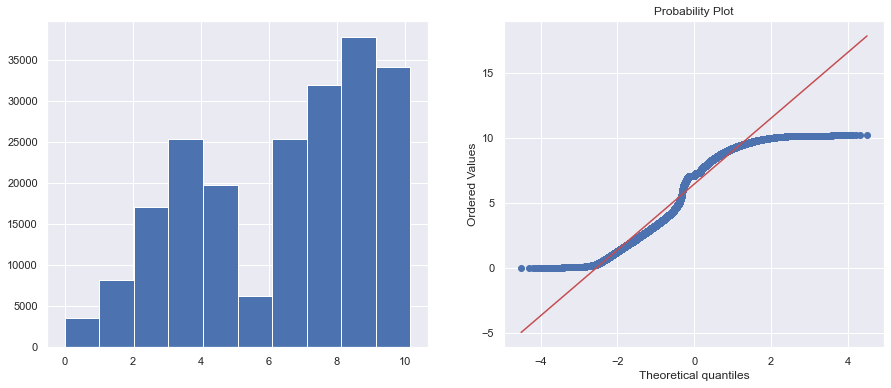

In [190]:
QQ_plot(df,"daily_decr90")

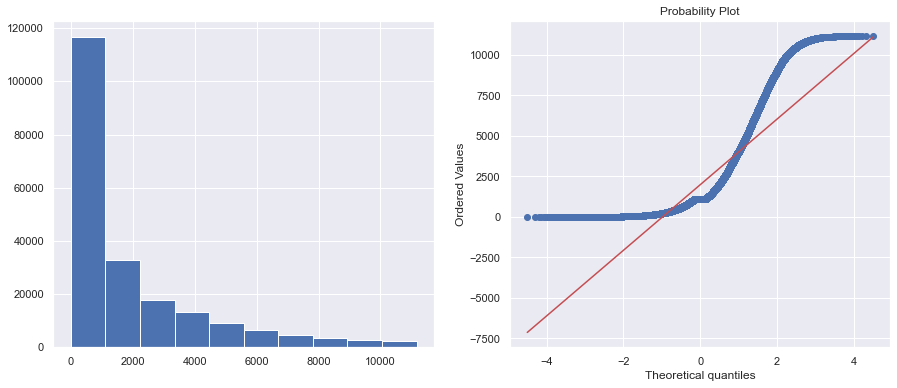

In [191]:
QQ_plot(df,"rental30")

In [192]:
df["rental30"].skew()

1.7936294345956172

In [193]:
logt("rental30")

-0.7497411442813289

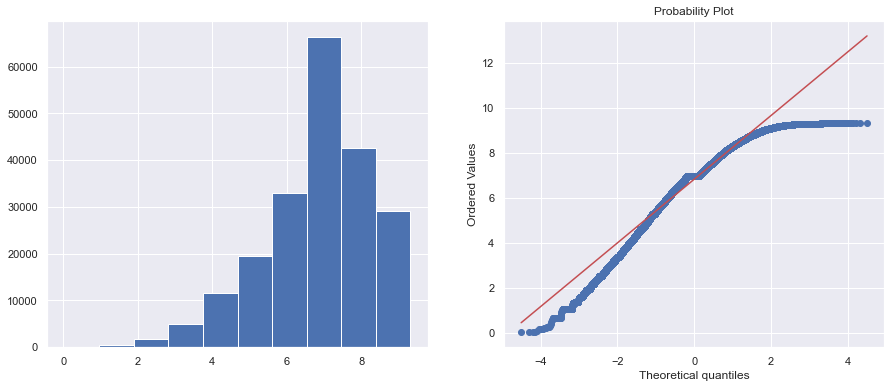

In [194]:
QQ_plot(df,"rental30")

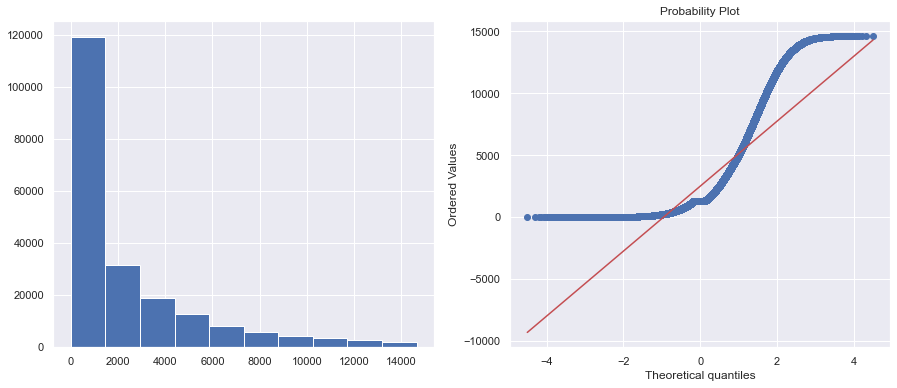

In [195]:
QQ_plot(df,"rental90")

In [196]:
df["rental90"].skew()

1.8456938098316846

In [197]:
logt("rental90")

-0.7424234671558504

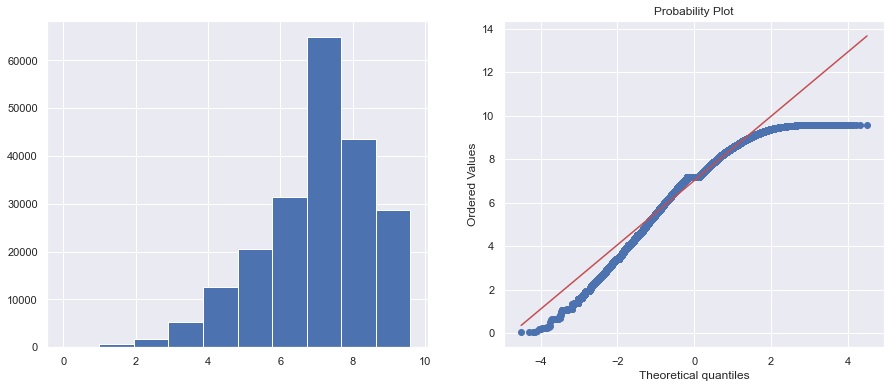

In [198]:
QQ_plot(df,"rental90")

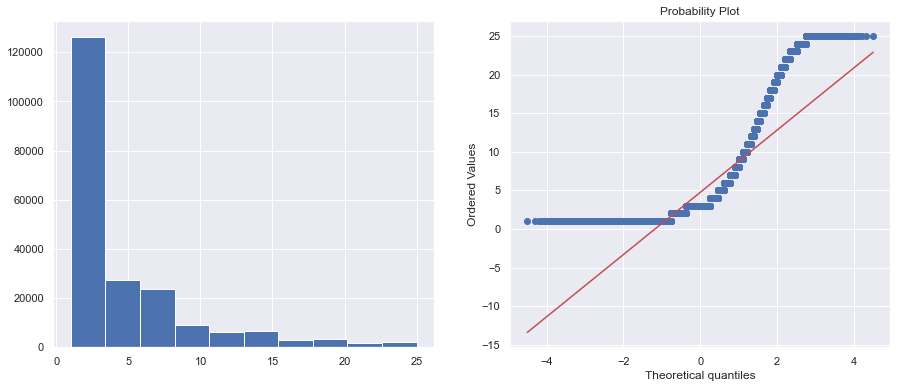

In [199]:
QQ_plot(df,"last_rech_date_ma")

In [200]:
logt("last_rech_date_ma")

0.6192965233216495

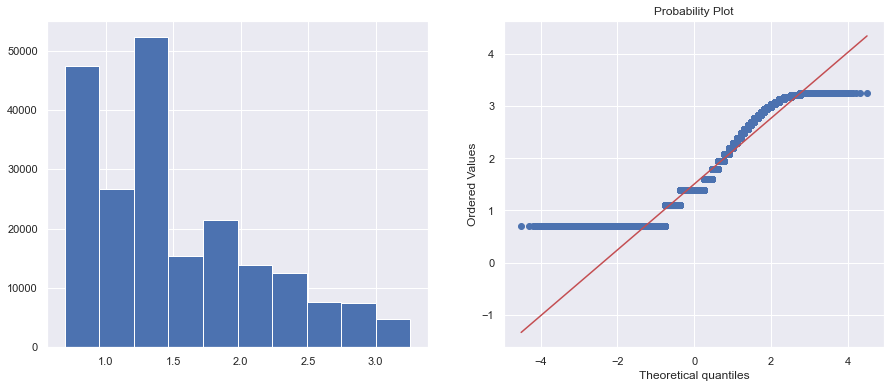

In [201]:
QQ_plot(df,"last_rech_date_ma")

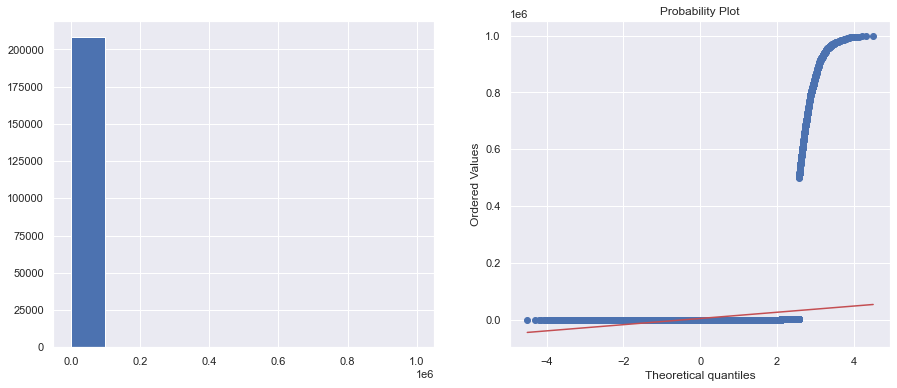

In [202]:
QQ_plot(df,"last_rech_date_da")

In [203]:
logt("last_rech_date_da")

9.853533686824177

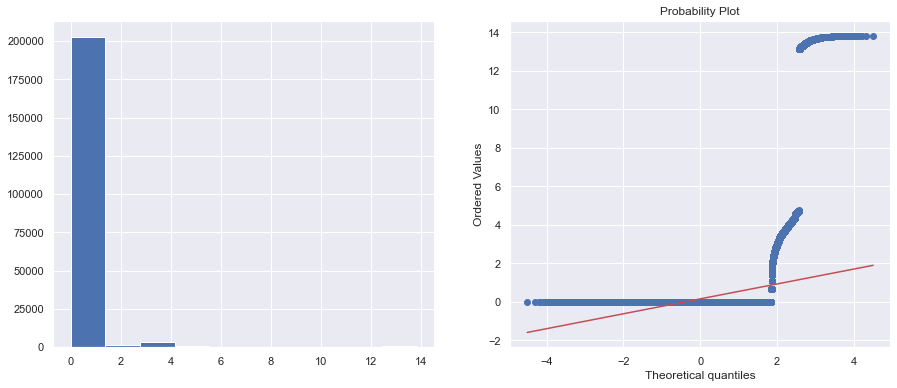

In [204]:
QQ_plot(df,"last_rech_date_da")

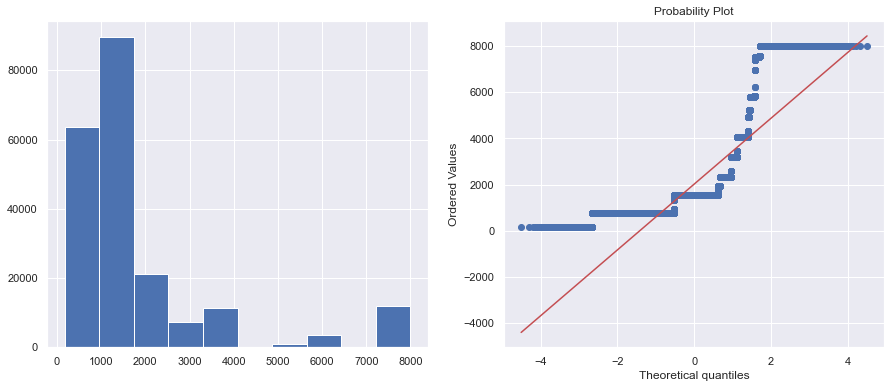

In [205]:
QQ_plot(df,"last_rech_amt_ma")

In [206]:
logt("last_rech_amt_ma")

0.698026598938344

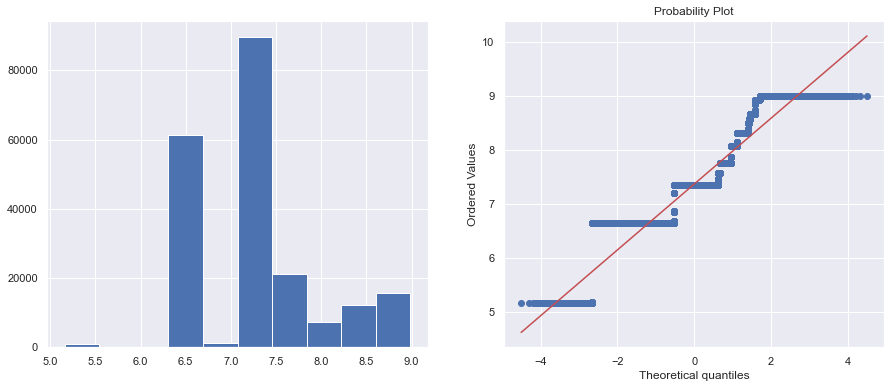

In [207]:
QQ_plot(df,"last_rech_amt_ma")

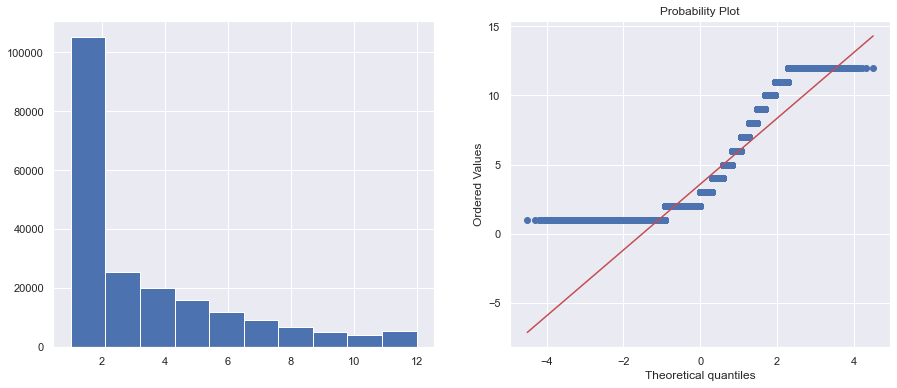

In [208]:
QQ_plot(df,"cnt_ma_rech30")

In [209]:
logt("cnt_ma_rech30")

0.45268739342357206

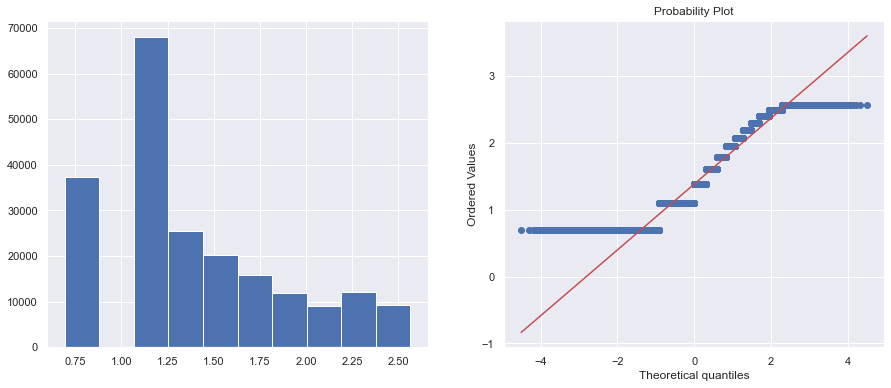

In [210]:
QQ_plot(df,"cnt_ma_rech30")

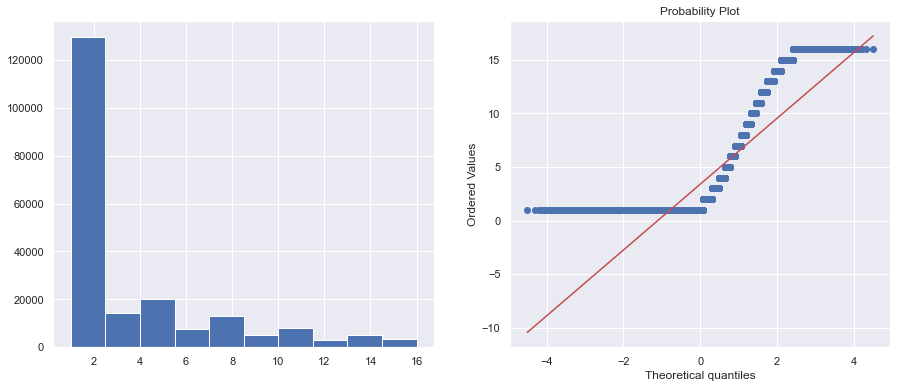

In [211]:
QQ_plot(df,"fr_ma_rech30")

In [212]:
logt("fr_ma_rech30")

0.8883745643596522

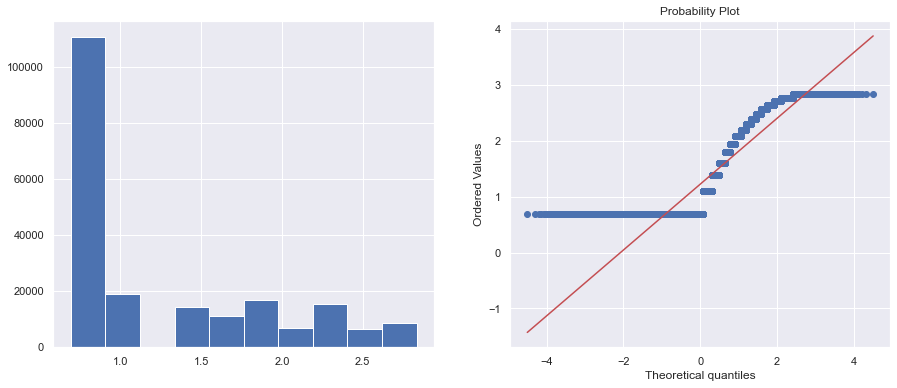

In [213]:
QQ_plot(df,"fr_ma_rech30")

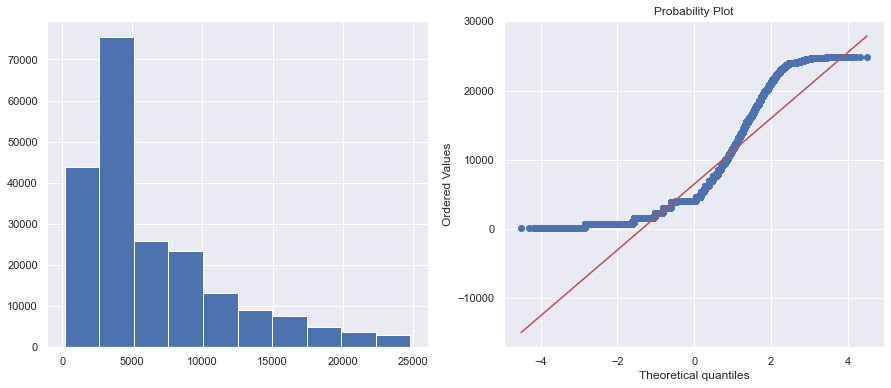

In [214]:
QQ_plot(df,"sumamnt_ma_rech30")

In [215]:
logt("sumamnt_ma_rech30")

-0.34962572760633515

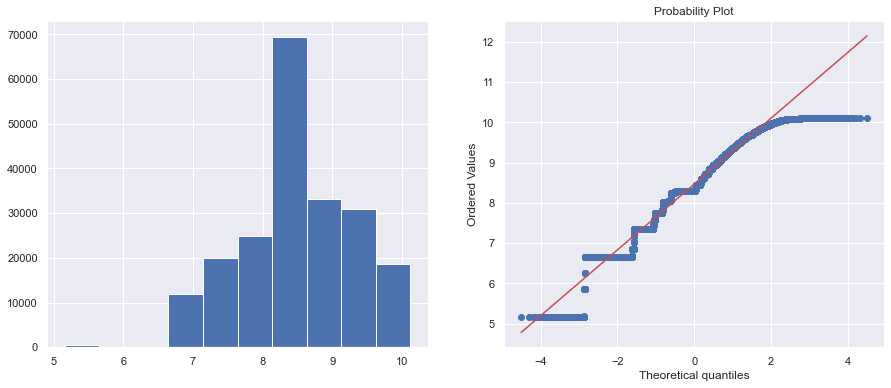

In [216]:
QQ_plot(df,"sumamnt_ma_rech30")

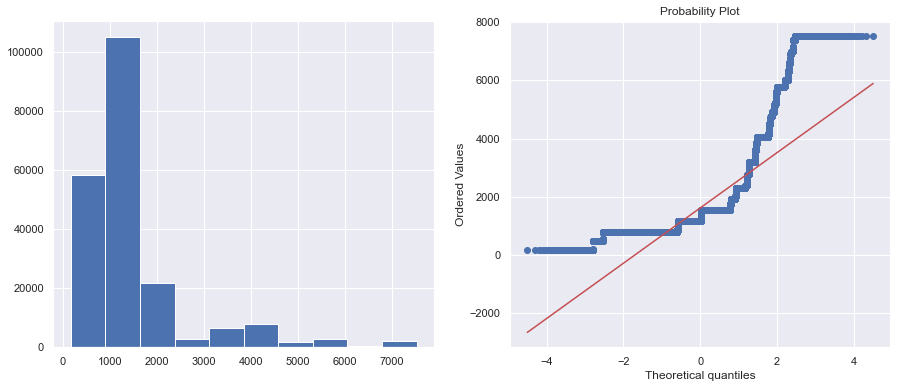

In [217]:
QQ_plot(df,"medianamnt_ma_rech30")

In [218]:
logt("medianamnt_ma_rech30")

0.765989816745107

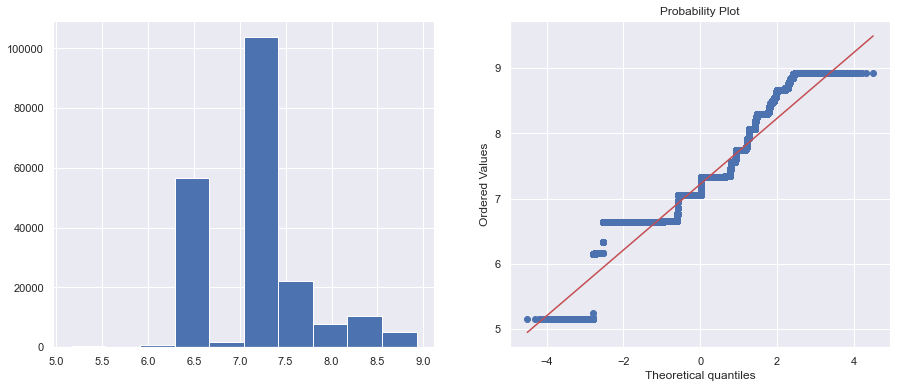

In [219]:
QQ_plot(df,"medianamnt_ma_rech30")

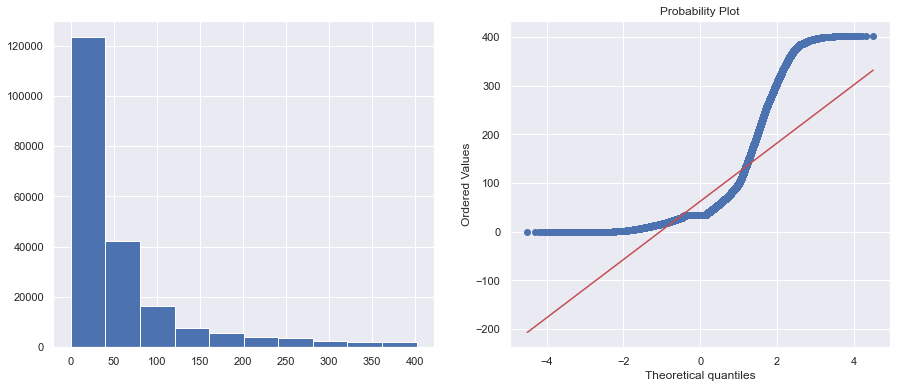

In [220]:
QQ_plot(df,"medianmarechprebal30")

In [221]:
logt("medianmarechprebal30")

-0.4380825595730485

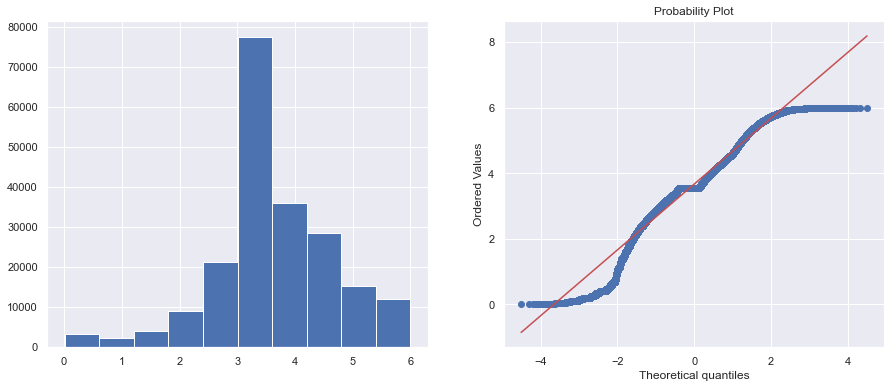

In [222]:
QQ_plot(df,"medianmarechprebal30")

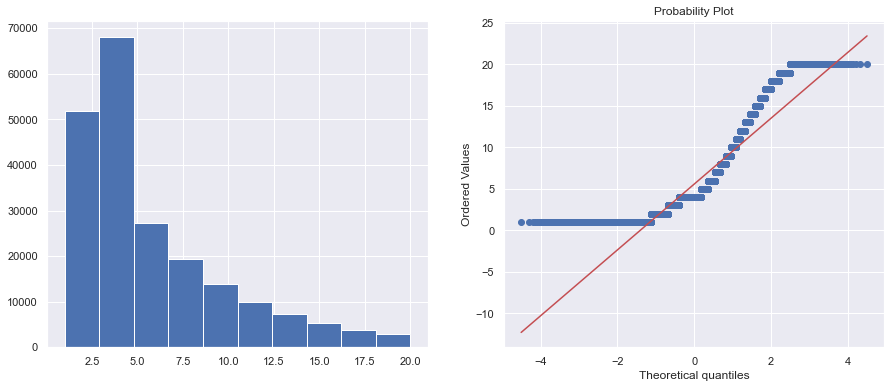

In [223]:
QQ_plot(df,"cnt_ma_rech90")

In [224]:
logt("cnt_ma_rech90")

0.13023813558082106

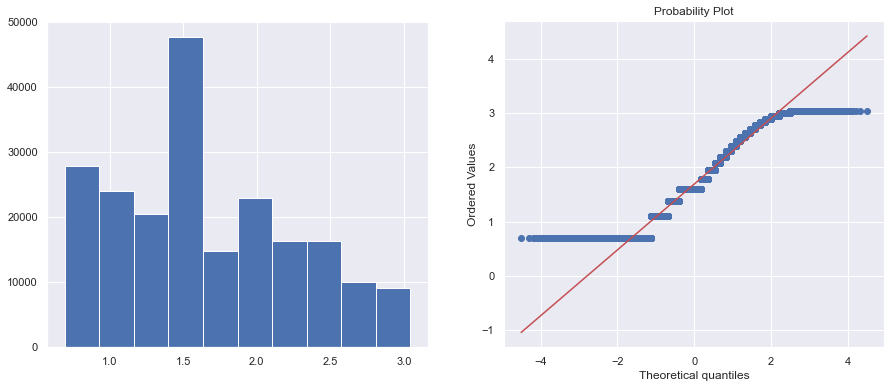

In [225]:
QQ_plot(df,"cnt_ma_rech90")

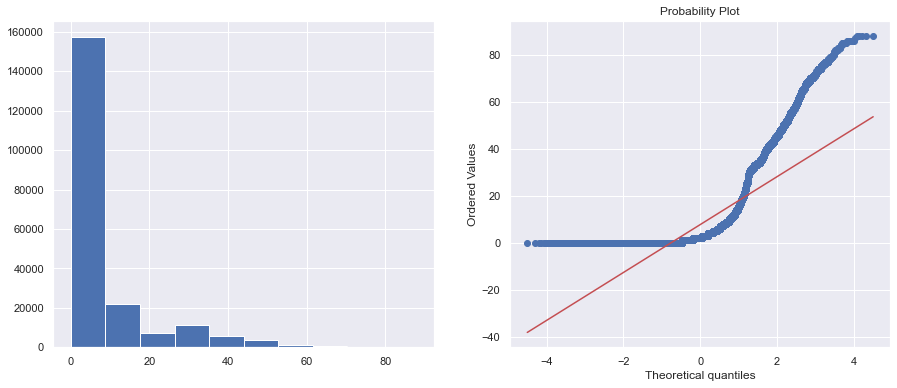

In [226]:
QQ_plot(df,"fr_ma_rech90")

In [227]:
logt("fr_ma_rech90")

0.5186062247416551

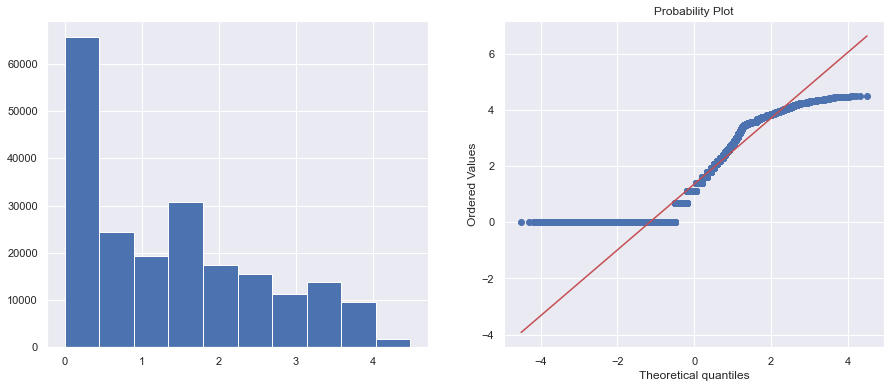

In [228]:
QQ_plot(df,"fr_ma_rech90")

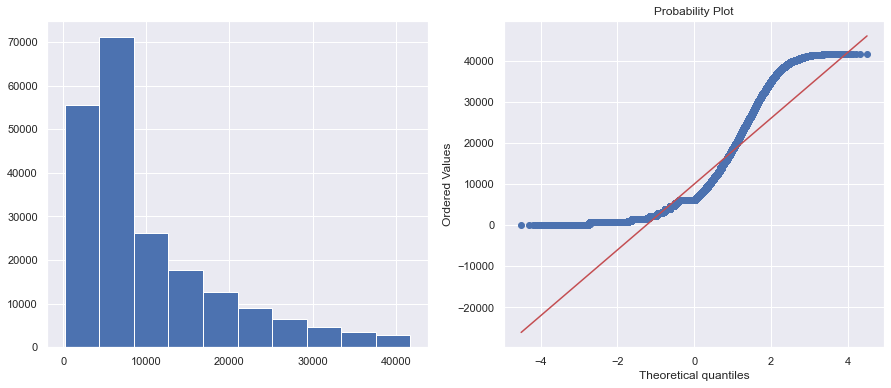

In [229]:
QQ_plot(df,"sumamnt_ma_rech90")

In [230]:
logt("sumamnt_ma_rech90")

-0.47841234284956546

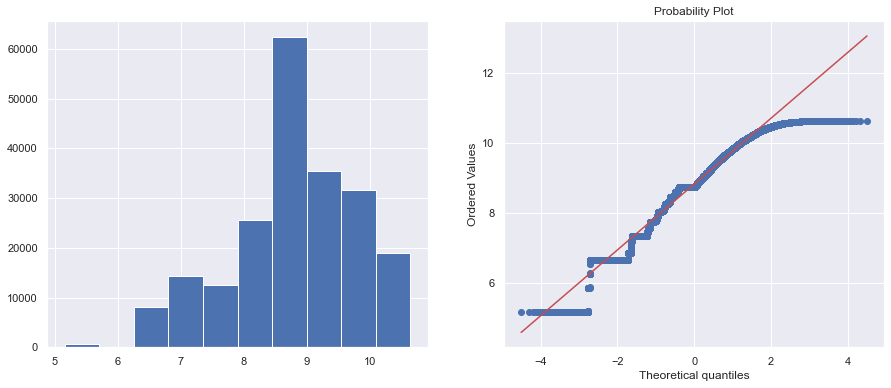

In [231]:
QQ_plot(df,"sumamnt_ma_rech90")

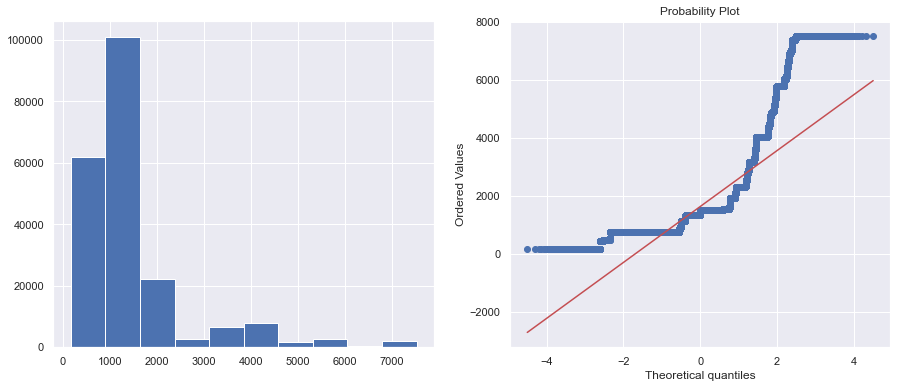

In [232]:
QQ_plot(df,"medianamnt_ma_rech90")

In [233]:
logt("medianamnt_ma_rech90")

0.5313001890961261

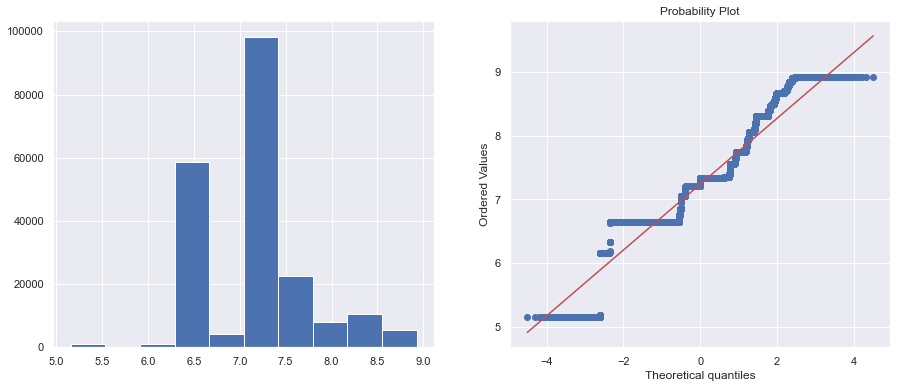

In [234]:
QQ_plot(df,"medianamnt_ma_rech90")

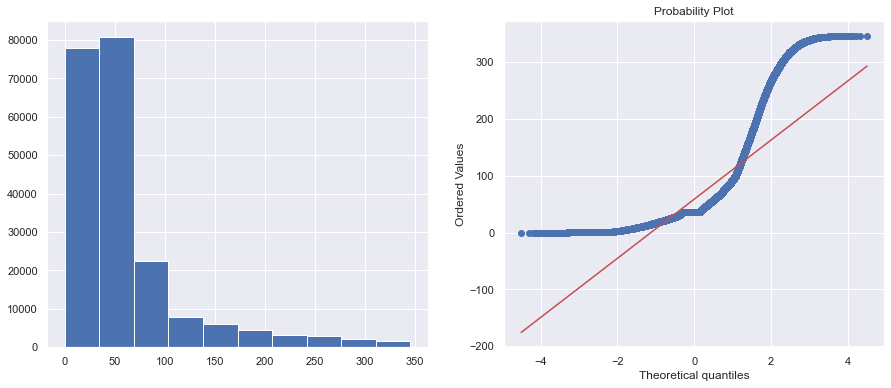

In [235]:
QQ_plot(df,"medianmarechprebal90")

In [236]:
logt("medianmarechprebal90")

-0.5251094970280543

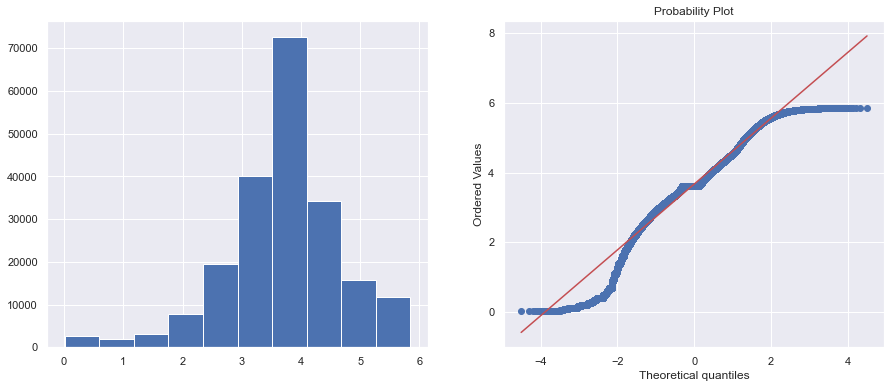

In [237]:
QQ_plot(df,"medianmarechprebal90")

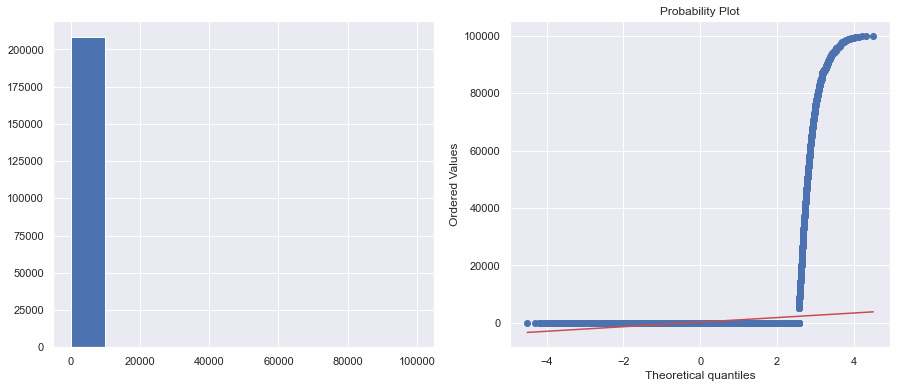

In [238]:
QQ_plot(df,"cnt_da_rech30")

In [239]:
logt("cnt_da_rech30")

13.709135549299473

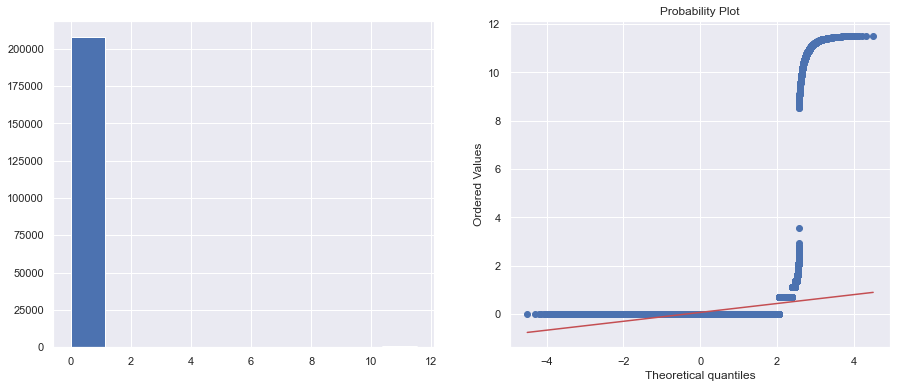

In [240]:
QQ_plot(df,"cnt_da_rech30")

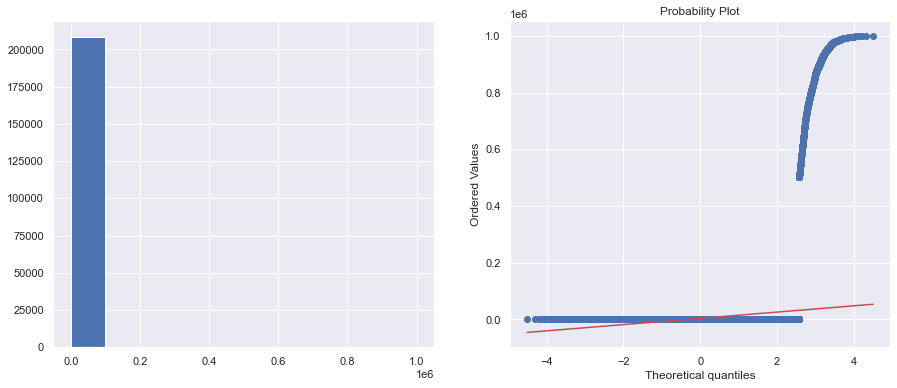

In [241]:
QQ_plot(df,"fr_da_rech30")

In [242]:
logt("fr_da_rech30")

13.840684570806843

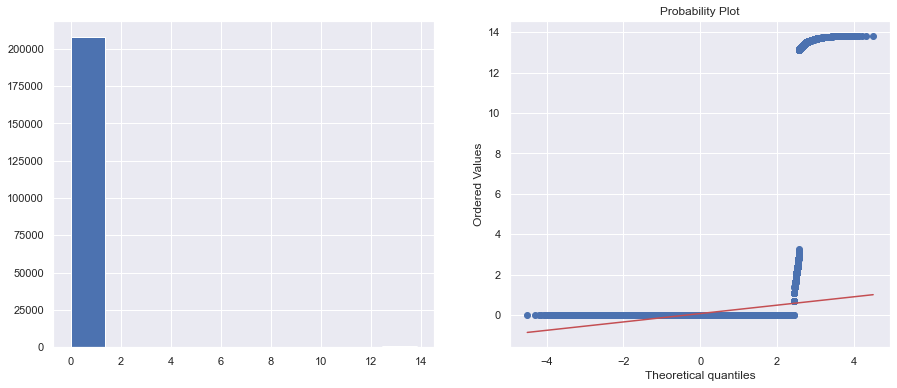

In [243]:
QQ_plot(df,"fr_da_rech30")

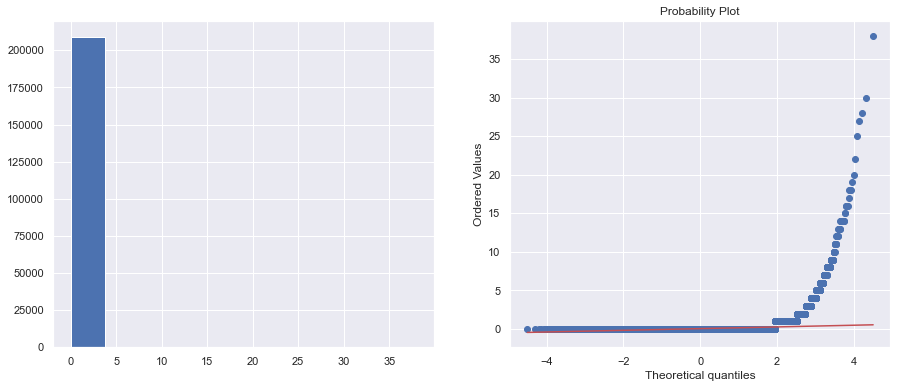

In [244]:
QQ_plot(df,"cnt_da_rech90")

In [245]:
logt("cnt_da_rech90")

8.491552064315902

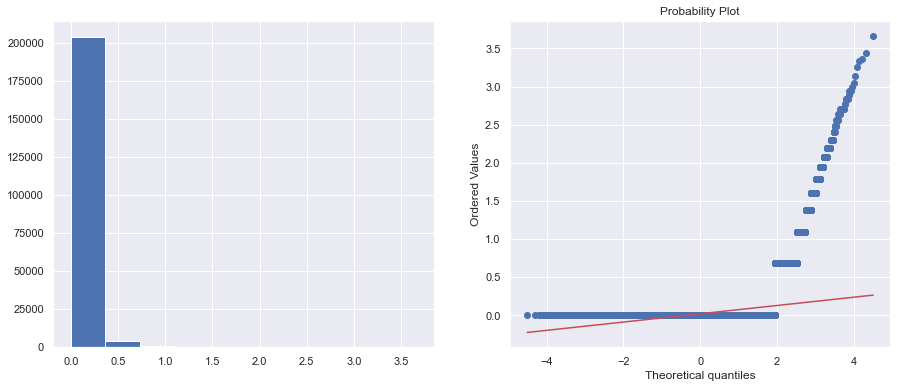

In [246]:
QQ_plot(df,"cnt_da_rech90")

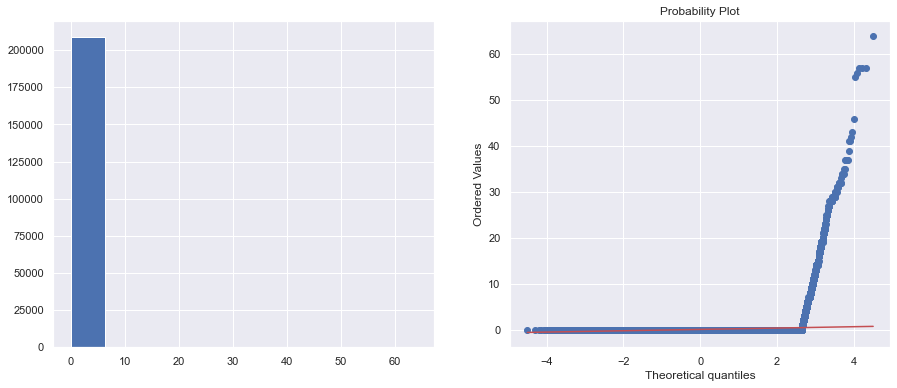

In [247]:
QQ_plot(df,"fr_da_rech90")

In [248]:
logt("fr_da_rech90")

18.08301729316904

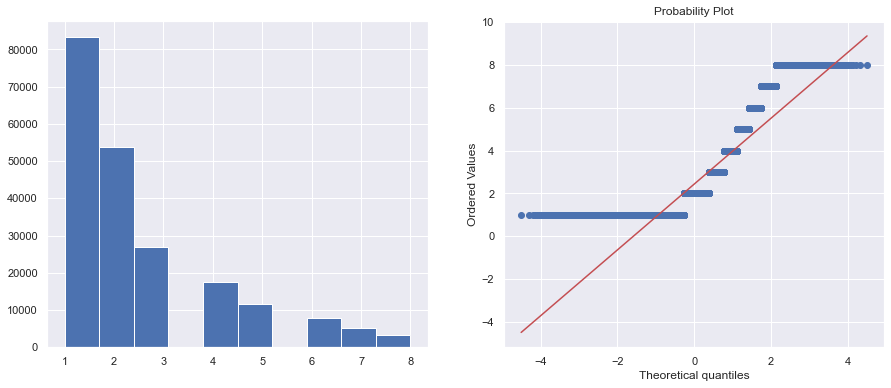

In [249]:
QQ_plot(df,"cnt_loans30")

In [250]:
logt("cnt_loans30")

0.6559740541354101

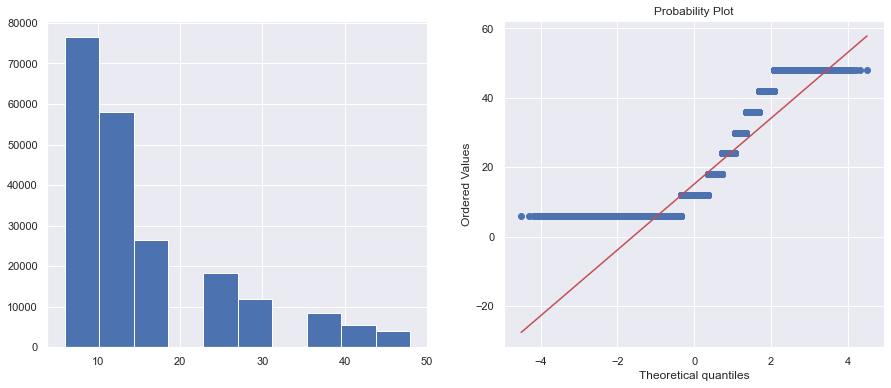

In [251]:
QQ_plot(df,"amnt_loans30")

In [252]:
logt("amnt_loans30")

0.4206861273240761

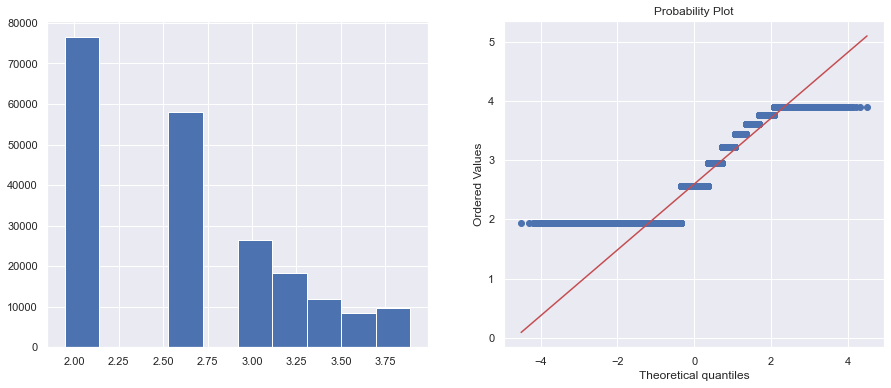

In [253]:
QQ_plot(df,"amnt_loans30")

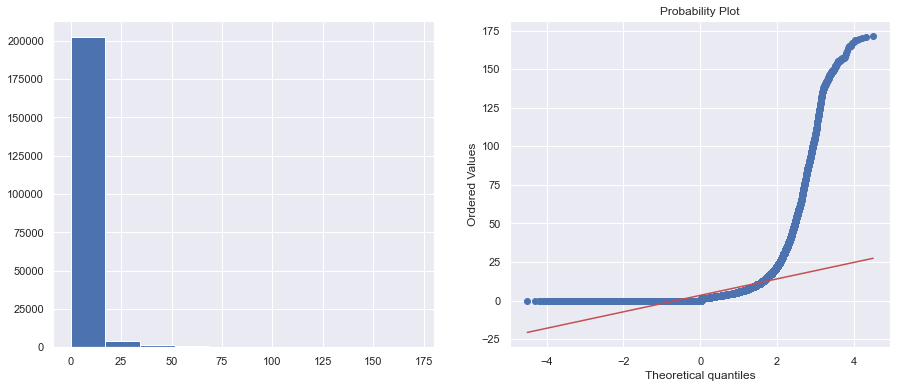

In [254]:
QQ_plot(df,"payback30")

In [255]:
logt("payback30")

0.9064617787487006

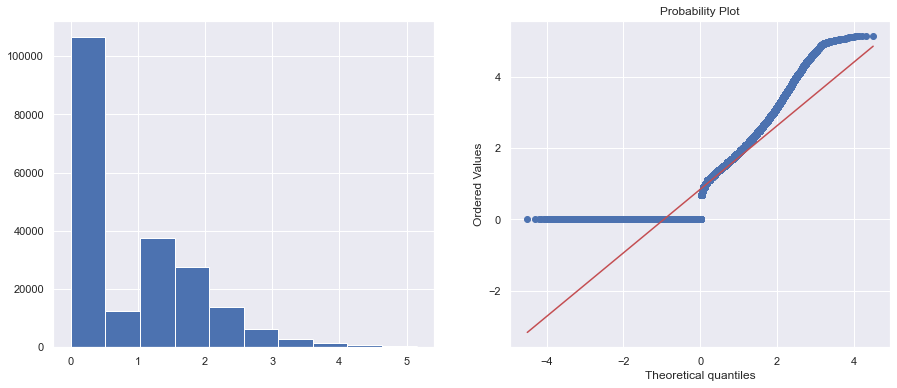

In [256]:
QQ_plot(df,"payback30")

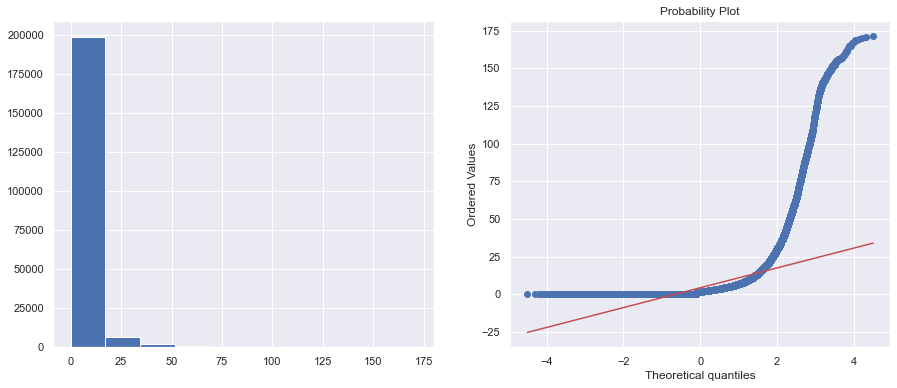

In [257]:
QQ_plot(df,"payback90")

In [258]:
logt("payback90")

0.7651245039109574

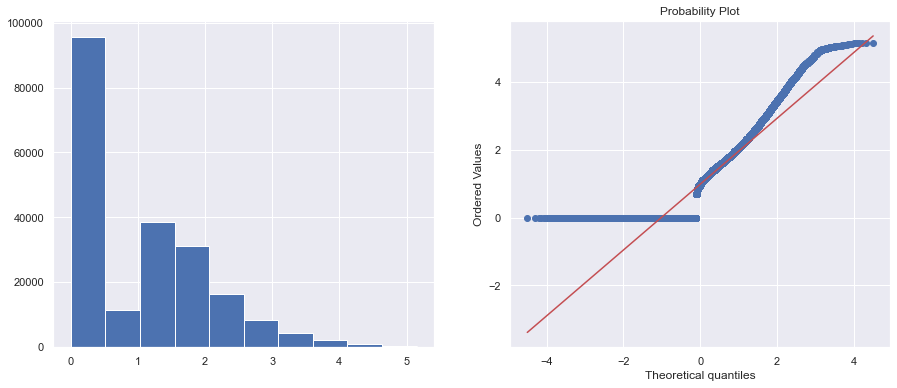

In [259]:
QQ_plot(df,"payback90")

In [260]:
df.skew()

msisdn                   0.018124
aon                     -0.535053
daily_decr30            -0.483433
daily_decr90            -0.459981
rental30                -0.749741
rental90                -0.742423
last_rech_date_ma        0.619297
last_rech_date_da        9.853534
last_rech_amt_ma         0.698027
cnt_ma_rech30            0.452687
fr_ma_rech30             0.888375
sumamnt_ma_rech30       -0.349626
medianamnt_ma_rech30     0.765990
medianmarechprebal30    -0.438083
cnt_ma_rech90            0.130238
fr_ma_rech90             0.518606
sumamnt_ma_rech90       -0.478412
medianamnt_ma_rech90     0.531300
medianmarechprebal90    -0.525109
cnt_da_rech30           13.709136
fr_da_rech30            13.840685
cnt_da_rech90            8.491552
fr_da_rech90            18.083017
cnt_loans30              0.655974
amnt_loans30             0.420686
maxamnt_loans30          1.241879
medianamnt_loans30       4.551043
cnt_loans90              1.517707
amnt_loans90             1.478278
maxamnt_loans9

#### There is still some skewness in the data we need to reduce it

### Log Transform

In [261]:
from sklearn.preprocessing import power_transform

In [262]:
df["last_rech_date_da"] = power_transform(df["last_rech_date_da"].values.reshape(-1,1))                         

In [263]:
df["last_rech_date_da"].skew()

5.313401730158212

In [264]:
df["rental30"] = power_transform(df["rental30"].values.reshape(-1,1))                         

In [265]:
df["rental30"].skew()

-0.09845512048589793

In [266]:
df["rental90"] = power_transform(df["rental90"].values.reshape(-1,1))                         

In [267]:
df["rental90"].skew()

-0.10982481603510767

In [268]:
df["last_rech_amt_ma"] = power_transform(df["last_rech_amt_ma"].values.reshape(-1,1))                         

In [269]:
df["fr_ma_rech30"] = power_transform(df["fr_ma_rech30"].values.reshape(-1,1))                         

In [270]:
df["fr_ma_rech30"].skew()

0.3716809341768289

In [271]:
df["medianamnt_ma_rech30"] = power_transform(df["medianamnt_ma_rech30"].values.reshape(-1,1))                         

In [272]:
df["medianamnt_ma_rech30"].skew()

-0.07368022317650552

In [273]:
df["cnt_da_rech30"] = power_transform(df["cnt_da_rech30"].values.reshape(-1,1))                         

In [274]:
df["cnt_da_rech30"].skew()

6.925820462205419

In [275]:
df["fr_da_rech30"] = power_transform(df["fr_da_rech30"].values.reshape(-1,1))                         

In [276]:
df["fr_da_rech30"].skew()

11.3906653319077

In [277]:
df["cnt_da_rech90"] = power_transform(df["cnt_da_rech90"].values.reshape(-1,1))                         

In [278]:
df["cnt_da_rech90"].skew()

6.006576961649055

In [279]:
df["fr_da_rech90"] = power_transform(df["fr_da_rech90"].values.reshape(-1,1))                         

In [280]:
df["fr_da_rech90"].skew()

15.469699924779537

In [281]:
df["maxamnt_loans30"] = power_transform(df["maxamnt_loans30"].values.reshape(-1,1))                         

In [282]:
df["maxamnt_loans30"].skew()

0.42268163451831664

In [283]:
df["medianamnt_loans30"] = power_transform(df["medianamnt_loans30"].values.reshape(-1,1))                         

In [284]:
df["medianamnt_loans30"].skew()

3.447735321547393

In [285]:
df["cnt_loans90"] = power_transform(df["cnt_loans90"].values.reshape(-1,1))                         

In [286]:
df["cnt_loans90"].skew()

0.18441196689072148

In [287]:
df["amnt_loans90"] = power_transform(df["amnt_loans90"].values.reshape(-1,1))                         

In [288]:
df["amnt_loans90"].skew()

0.11602503799457223

In [289]:
df["maxamnt_loans90"] = power_transform(df["maxamnt_loans90"].values.reshape(-1,1))                         

In [290]:
df["maxamnt_loans90"].skew()

0.36428205312757667

In [291]:
df["medianamnt_loans90"] = power_transform(df["medianamnt_loans90"].values.reshape(-1,1))                         

In [292]:
df["medianamnt_loans90"].skew()

3.779598147849415

In [293]:
df["payback30"] = power_transform(df["payback30"].values.reshape(-1,1))                         

In [294]:
df["payback30"].skew()

0.19867233307357246

In [295]:
df["payback90"] = power_transform(df["payback90"].values.reshape(-1,1))                         

In [296]:
df["payback90"].skew()

0.08820683512496039

In [297]:
df.skew()

msisdn                   0.018124
aon                     -0.535053
daily_decr30            -0.483433
daily_decr90            -0.459981
rental30                -0.098455
rental90                -0.109825
last_rech_date_ma        0.619297
last_rech_date_da        5.313402
last_rech_amt_ma        -0.043020
cnt_ma_rech30            0.452687
fr_ma_rech30             0.371681
sumamnt_ma_rech30       -0.349626
medianamnt_ma_rech30    -0.073680
medianmarechprebal30    -0.438083
cnt_ma_rech90            0.130238
fr_ma_rech90             0.518606
sumamnt_ma_rech90       -0.478412
medianamnt_ma_rech90     0.531300
medianmarechprebal90    -0.525109
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.655974
amnt_loans30             0.420686
maxamnt_loans30          0.422682
medianamnt_loans30       3.447735
cnt_loans90              0.184412
amnt_loans90             0.116025
maxamnt_loans9

In [298]:
df.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,2140870789,5.609472,8.024879,8.028178,-1.069255,-1.041421,1.098612,-0.181972,0.061095,1.098612,-0.896035,8.032360,0.310522,2.140066,1.098612,3.091042,8.032360,7.339538,2.140066,-0.141497,-0.087125,-0.16211,-0.064375,1.098612,2.564949,-0.245447,-0.269051,-0.100737,-0.116817,-0.285611,-0.248272,1.644447,1.630079,7,20
1,7646270374,6.569481,9.402860,9.403087,1.015349,0.808155,3.044522,-0.181972,1.799606,0.693147,-0.896035,8.663542,2.316530,4.127779,0.693147,0.000000,8.663542,8.663542,4.127779,-0.141497,-0.087125,-0.16211,-0.064375,0.693147,2.564949,2.301616,-0.269051,-1.153439,-0.116817,2.325828,-0.248272,-0.954773,-1.042532,8,10
2,1794370372,6.284134,7.243513,7.243513,-0.146513,-0.272648,1.386294,-0.181972,0.061095,0.693147,-0.896035,7.339538,0.310522,4.209457,0.693147,0.000000,7.339538,7.339538,4.209457,-0.141497,-0.087125,-0.16211,-0.064375,0.693147,1.945910,-0.245447,-0.269051,-1.153439,-1.208127,-0.285611,-0.248272,-0.954773,-1.042532,8,19
3,5577370781,5.488938,3.101353,3.101353,-1.248368,-1.299169,1.386294,-0.181972,-0.762611,1.098612,-0.896035,8.300529,-0.242565,3.552487,0.693147,0.000000,6.854355,6.854355,1.252763,-0.141497,-0.087125,-0.16211,-0.064375,1.098612,2.564949,-0.245447,-0.269051,-0.100737,-0.116817,-0.285611,-0.248272,-0.954773,-1.042532,6,6
4,381382730,6.854355,5.021373,5.021373,0.003125,-0.133371,1.609438,-0.181972,0.663332,2.079442,0.243035,9.904986,1.015357,3.401197,2.197225,1.098612,10.064628,7.968666,3.583519,-0.141497,-0.087125,-0.16211,-0.064375,2.079442,3.761200,-0.245447,-0.269051,1.430608,1.379270,-0.285611,-0.248272,0.736209,0.530929,6,22


Based on correlation results we need to drop certain columns

In [299]:
df = df.drop(["last_rech_date_da","cnt_da_rech30","fr_da_rech30","cnt_da_rech90","fr_da_rech90"],axis=1)

In [300]:
df.skew()

msisdn                  0.018124
aon                    -0.535053
daily_decr30           -0.483433
daily_decr90           -0.459981
rental30               -0.098455
rental90               -0.109825
last_rech_date_ma       0.619297
last_rech_amt_ma       -0.043020
cnt_ma_rech30           0.452687
fr_ma_rech30            0.371681
sumamnt_ma_rech30      -0.349626
medianamnt_ma_rech30   -0.073680
medianmarechprebal30   -0.438083
cnt_ma_rech90           0.130238
fr_ma_rech90            0.518606
sumamnt_ma_rech90      -0.478412
medianamnt_ma_rech90    0.531300
medianmarechprebal90   -0.525109
cnt_loans30             0.655974
amnt_loans30            0.420686
maxamnt_loans30         0.422682
medianamnt_loans30      3.447735
cnt_loans90             0.184412
amnt_loans90            0.116025
maxamnt_loans90         0.364282
medianamnt_loans90      3.779598
payback30               0.198672
payback90               0.088207
Month                   0.343242
Day                     0.199845
dtype: flo

#### Most of the skewness has been reduced

## Train Test Split

In [301]:
df.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,2140870789,5.609472,8.024879,8.028178,-1.069255,-1.041421,1.098612,0.061095,1.098612,-0.896035,8.032360,0.310522,2.140066,1.098612,3.091042,8.032360,7.339538,2.140066,1.098612,2.564949,-0.245447,-0.269051,-0.100737,-0.116817,-0.285611,-0.248272,1.644447,1.630079,7,20
1,7646270374,6.569481,9.402860,9.403087,1.015349,0.808155,3.044522,1.799606,0.693147,-0.896035,8.663542,2.316530,4.127779,0.693147,0.000000,8.663542,8.663542,4.127779,0.693147,2.564949,2.301616,-0.269051,-1.153439,-0.116817,2.325828,-0.248272,-0.954773,-1.042532,8,10
2,1794370372,6.284134,7.243513,7.243513,-0.146513,-0.272648,1.386294,0.061095,0.693147,-0.896035,7.339538,0.310522,4.209457,0.693147,0.000000,7.339538,7.339538,4.209457,0.693147,1.945910,-0.245447,-0.269051,-1.153439,-1.208127,-0.285611,-0.248272,-0.954773,-1.042532,8,19
3,5577370781,5.488938,3.101353,3.101353,-1.248368,-1.299169,1.386294,-0.762611,1.098612,-0.896035,8.300529,-0.242565,3.552487,0.693147,0.000000,6.854355,6.854355,1.252763,1.098612,2.564949,-0.245447,-0.269051,-0.100737,-0.116817,-0.285611,-0.248272,-0.954773,-1.042532,6,6
4,381382730,6.854355,5.021373,5.021373,0.003125,-0.133371,1.609438,0.663332,2.079442,0.243035,9.904986,1.015357,3.401197,2.197225,1.098612,10.064628,7.968666,3.583519,2.079442,3.761200,-0.245447,-0.269051,1.430608,1.379270,-0.285611,-0.248272,0.736209,0.530929,6,22


In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X = df.values

In [304]:
X

array([[ 2.14087079e+09,  5.60947180e+00,  8.02487851e+00, ...,
         1.63007938e+00,  7.00000000e+00,  2.00000000e+01],
       [ 7.64627037e+09,  6.56948142e+00,  9.40285975e+00, ...,
        -1.04253182e+00,  8.00000000e+00,  1.00000000e+01],
       [ 1.79437037e+09,  6.28413416e+00,  7.24351297e+00, ...,
        -1.04253182e+00,  8.00000000e+00,  1.90000000e+01],
       ...,
       [ 2.85568535e+09,  6.92165818e+00,  9.37958612e+00, ...,
         7.99031432e-01,  7.00000000e+00,  2.90000000e+01],
       [ 5.97128273e+09,  7.45760929e+00,  9.43262182e+00, ...,
         1.26569439e+00,  7.00000000e+00,  2.50000000e+01],
       [ 6.50618534e+09,  7.36644515e+00,  8.40968860e+00, ...,
        -1.04253182e+00,  7.00000000e+00,  7.00000000e+00]])

In [305]:
y = y.values

In [306]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [308]:
X_train.shape

(157194, 30)

In [309]:
X_test.shape

(52399, 30)

In [310]:
y_train.shape

(157194,)

In [311]:
y_test.shape

(52399,)

## Scaling the data

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
sc = StandardScaler()

In [314]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [315]:
X_train

array([[ 0.77625116,  0.97272996,  0.40403907, ..., -1.04248779,
         1.62448747,  0.42706287],
       [-0.82712238, -1.08306352, -1.34338781, ..., -1.04248779,
        -1.07457536, -0.75823929],
       [ 1.41411673,  0.05489791, -2.18405926, ..., -1.04248779,
        -1.07457536, -1.5879508 ],
       ...,
       [-0.10287737, -1.63858583, -0.11606242, ..., -1.04248779,
         0.27495606,  0.42706287],
       [ 1.34281635, -1.31374008, -1.00792015, ...,  1.28497431,
        -1.07457536, -0.63970907],
       [-1.115645  , -1.33776179,  0.98038191, ..., -1.04248779,
         0.27495606, -0.63970907]])

In [316]:
X_test

array([[ 1.40031106,  1.2420435 ,  0.87309785, ...,  0.90995566,
         0.27495606, -0.28411842],
       [-1.00522449,  0.36609392,  1.16547861, ..., -1.04248779,
         0.27495606,  1.13824417],
       [ 1.57608935, -0.09443134,  0.2699596 , ..., -1.04248779,
         0.27495606,  0.42706287],
       ...,
       [ 0.35132301,  1.02940148,  0.67447325, ...,  0.60534109,
         0.27495606, -0.63970907],
       [ 0.54480622, -0.01750022,  0.31666125, ..., -1.04248779,
         0.27495606, -1.35089037],
       [ 1.12732432,  0.32915742, -2.29176175, ..., -1.04248779,
        -1.07457536,  1.01971395]])

## Machine Learning

### Logistic regression

In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [319]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.8754723462727585
for random state  0  The testing accuracy is : 0.8742914941124831


for random state  1  The training accuracy is : 0.8751033754469
for random state  1  The testing accuracy is : 0.8753983854653715


for random state  2  The training accuracy is : 0.8756504701197246
for random state  2  The testing accuracy is : 0.8737571327697093


for random state  3  The training accuracy is : 0.8750715676170846
for random state  3  The testing accuracy is : 0.8754938071337239


for random state  4  The training accuracy is : 0.8756568316856878
for random state  4  The testing accuracy is : 0.8737380484360389


for random state  5  The training accuracy is : 0.8755232388004631
for random state  5  The testing accuracy is : 0.8741388194431191


for random state  6  The training accuracy is : 0.8750842907490107
for random state  6  The testing accuracy is : 0.875455638466383


for random state  7  The training accuracy is : 0.876566535

for random state  61  The training accuracy is : 0.87502067508938
for random state  61  The testing accuracy is : 0.8756464818030878


for random state  62  The training accuracy is : 0.8748807206381923
for random state  62  The testing accuracy is : 0.8760663371438386


for random state  63  The training accuracy is : 0.8749697825616753
for random state  63  The testing accuracy is : 0.8757991564724518


for random state  64  The training accuracy is : 0.8751415448426785
for random state  64  The testing accuracy is : 0.8752838794633485


for random state  65  The training accuracy is : 0.8753960074812016
for random state  65  The testing accuracy is : 0.874520506116529


for random state  66  The training accuracy is : 0.8747789355827831
for random state  66  The testing accuracy is : 0.8763716864825665


for random state  67  The training accuracy is : 0.875179714238457
for random state  67  The testing accuracy is : 0.8751693734613256


for random state  68  The training accuracy i

In [320]:
# Taking 8 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 0.8752306067661616
The testing accuracy is : 0.8750166987919616


In [321]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[    0  6549]
 [    0 45850]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6549
           1       0.88      1.00      0.93     45850

    accuracy                           0.88     52399
   macro avg       0.44      0.50      0.47     52399
weighted avg       0.77      0.88      0.82     52399





## Stratified Cross Validation

In [322]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [323]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [324]:
kfold_accuracy_LR

0.87517712926619

In [325]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [326]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.875231,0.875017,0.875177


## Naive Bayes

In [327]:
from sklearn.naive_bayes import GaussianNB

In [328]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_2 = GaussianNB() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = accuracy_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.8754723462727585
for random state  0  The testing accuracy is : 0.8742914941124831


for random state  1  The training accuracy is : 0.8751033754469
for random state  1  The testing accuracy is : 0.8753983854653715


for random state  2  The training accuracy is : 0.8756504701197246
for random state  2  The testing accuracy is : 0.8737571327697093


for random state  3  The training accuracy is : 0.8750715676170846
for random state  3  The testing accuracy is : 0.8754938071337239


for random state  4  The training accuracy is : 0.8756568316856878
for random state  4  The testing accuracy is : 0.8737380484360389


for random state  5  The training accuracy is : 0.8755232388004631
for random state  5  The testing accuracy is : 0.8741388194431191


for random state  6  The training accuracy is : 0.8750842907490107
for random state  6  The testing accuracy is : 0.875455638466383


for random state  7  The training accuracy is : 0.876566535

for random state  61  The training accuracy is : 0.87502067508938
for random state  61  The testing accuracy is : 0.8756464818030878


for random state  62  The training accuracy is : 0.8748807206381923
for random state  62  The testing accuracy is : 0.8760663371438386


for random state  63  The training accuracy is : 0.8749697825616753
for random state  63  The testing accuracy is : 0.8757991564724518


for random state  64  The training accuracy is : 0.8751415448426785
for random state  64  The testing accuracy is : 0.8752838794633485


for random state  65  The training accuracy is : 0.8753960074812016
for random state  65  The testing accuracy is : 0.874520506116529


for random state  66  The training accuracy is : 0.8747789355827831
for random state  66  The testing accuracy is : 0.8763716864825665


for random state  67  The training accuracy is : 0.875179714238457
for random state  67  The testing accuracy is : 0.8751693734613256


for random state  68  The training accuracy i

In [329]:
# Taking 64 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)
mod_2 = GaussianNB() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.8751415448426785
The testing accuracy is : 0.8752838794633485




In [330]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[    0  6535]
 [    0 45864]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6535
           1       0.88      1.00      0.93     45864

    accuracy                           0.88     52399
   macro avg       0.44      0.50      0.47     52399
weighted avg       0.77      0.88      0.82     52399





## Stratified Cross Validation

In [331]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [332]:
kfold_accuracy_NB

0.87517712926619

In [333]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [334]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.875231,0.875017,0.875177
1,Naive Bayes,0.875142,0.875284,0.875177


##  Random forest Classification

In [335]:
from sklearn.ensemble import RandomForestClassifier

In [336]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.9999872768680739
for random state  0  The testing accuracy is : 0.9206664249317735


for random state  1  The training accuracy is : 0.9999809153021108
for random state  1  The testing accuracy is : 0.9209145212694899


for random state  2  The training accuracy is : 0.9999809153021108
for random state  2  The testing accuracy is : 0.9192160155728163


for random state  3  The training accuracy is : 0.9999745537361477
for random state  3  The testing accuracy is : 0.9207618466001259


for random state  4  The training accuracy is : 0.9999427459063323
for random state  4  The testing accuracy is : 0.919788545582931


for random state  5  The training accuracy is : 0.9999809153021108
for random state  5  The testing accuracy is : 0.9184717265596671


for random state  6  The training accuracy is : 0.9999618306042215
for random state  6  The testing accuracy is : 0.9214870512796046


for random state  7  The training accuracy is : 0.999968

for random state  61  The training accuracy is : 0.9999745537361477
for random state  61  The testing accuracy is : 0.9201129792553293


for random state  62  The training accuracy is : 0.9999872768680739
for random state  62  The testing accuracy is : 0.9209145212694899


for random state  63  The training accuracy is : 0.9999681921701846
for random state  63  The testing accuracy is : 0.9206091719307621


for random state  64  The training accuracy is : 0.9999745537361477
for random state  64  The testing accuracy is : 0.9200175575869769


for random state  65  The training accuracy is : 0.9999681921701846
for random state  65  The testing accuracy is : 0.919826714250272


for random state  66  The training accuracy is : 0.9999809153021108
for random state  66  The testing accuracy is : 0.9213343766102406


for random state  67  The training accuracy is : 0.9999809153021108
for random state  67  The testing accuracy is : 0.9209145212694899


for random state  68  The training accurac

In [337]:
# Taking the best random state as 28
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.9999681921701846
The testing accuracy is : 0.920723677932785




In [338]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[ 3303  3189]
 [  965 44942]]


              precision    recall  f1-score   support

           0       0.77      0.51      0.61      6492
           1       0.93      0.98      0.96     45907

    accuracy                           0.92     52399
   macro avg       0.85      0.74      0.78     52399
weighted avg       0.91      0.92      0.91     52399





## Stratified Cross Validation

In [339]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [340]:
kfold_accuracy_RFR

0.9202215892514977

##  Decision Tree

In [341]:
from sklearn.tree import DecisionTreeClassifier

In [342]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.9999872768680739
for random state  0  The testing accuracy is : 0.8836809862783641


for random state  1  The training accuracy is : 0.9999936384340369
for random state  1  The testing accuracy is : 0.8814099505715758


for random state  2  The training accuracy is : 0.9999809153021108
for random state  2  The testing accuracy is : 0.8821160709173839


for random state  3  The training accuracy is : 0.9999809153021108
for random state  3  The testing accuracy is : 0.88001679421363


for random state  4  The training accuracy is : 0.9999681921701846
for random state  4  The testing accuracy is : 0.8786045535220138


for random state  5  The training accuracy is : 0.9999809153021108
for random state  5  The testing accuracy is : 0.8794633485371858


for random state  6  The training accuracy is : 0.9999745537361477
for random state  6  The testing accuracy is : 0.8814290349052463


for random state  7  The training accuracy is : 0.9999745

for random state  61  The training accuracy is : 0.9999936384340369
for random state  61  The testing accuracy is : 0.880913757896143


for random state  62  The training accuracy is : 0.9999872768680739
for random state  62  The testing accuracy is : 0.8811809385675299


for random state  63  The training accuracy is : 0.9999809153021108
for random state  63  The testing accuracy is : 0.8812191072348708


for random state  64  The training accuracy is : 0.9999809153021108
for random state  64  The testing accuracy is : 0.8798832038779366


for random state  65  The training accuracy is : 0.9999809153021108
for random state  65  The testing accuracy is : 0.8781656138475925


for random state  66  The training accuracy is : 0.9999872768680739
for random state  66  The testing accuracy is : 0.8790053245290941


for random state  67  The training accuracy is : 0.9999872768680739
for random state  67  The testing accuracy is : 0.881810721578656


for random state  68  The training accuracy

In [343]:
# Taking 81 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.9999809153021108
The testing accuracy is : 0.8816389625756217




In [344]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[ 3499  2896]
 [ 3306 42698]]


              precision    recall  f1-score   support

           0       0.51      0.55      0.53      6395
           1       0.94      0.93      0.93     46004

    accuracy                           0.88     52399
   macro avg       0.73      0.74      0.73     52399
weighted avg       0.88      0.88      0.88     52399





## Stratified Cross Validation

In [345]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [346]:
kfold_accuracy_DT

0.8810122653133398

In [347]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [348]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.875231,0.875017,0.875177
1,Naive Bayes,0.875142,0.875284,0.875177
2,Random Forest Classi,0.999968,0.920724,0.920222
3,Decision Tree,0.999981,0.881639,0.881012


## AdaBoost

In [349]:
from sklearn.ensemble import AdaBoostClassifier

In [350]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9089087369746937
for random state  0  The testing accuracy is : 0.9089868127254337


for random state  1  The training accuracy is : 0.9077064010076721
for random state  1  The testing accuracy is : 0.9083570297143075


for random state  2  The training accuracy is : 0.9083934501316844
for random state  2  The testing accuracy is : 0.9059714880054963


for random state  3  The training accuracy is : 0.9083998116976475
for random state  3  The testing accuracy is : 0.909311246397832


for random state  4  The training accuracy is : 0.9099647569245646
for random state  4  The testing accuracy is : 0.9087005477203763


for random state  5  The training accuracy is : 0.9096403170604476
for random state  5  The testing accuracy is : 0.9088913910570813


for random state  6  The training accuracy is : 0.907865440156749
for random state  6  The testing accuracy is : 0.907440981698124


for random state  7  The training accuracy is : 0.90902324

for random state  61  The training accuracy is : 0.9076300622161151
for random state  61  The testing accuracy is : 0.908414282715319


for random state  62  The training accuracy is : 0.9077891013651921
for random state  62  The testing accuracy is : 0.9080516803755797


for random state  63  The training accuracy is : 0.907941778948306
for random state  63  The testing accuracy is : 0.9067539456859863


for random state  64  The training accuracy is : 0.9086288280723183
for random state  64  The testing accuracy is : 0.9101700414130041


for random state  65  The training accuracy is : 0.9080562871356413
for random state  65  The testing accuracy is : 0.9063340903452356


for random state  66  The training accuracy is : 0.908520681450946
for random state  66  The testing accuracy is : 0.909502089734537


for random state  67  The training accuracy is : 0.9080181177398629
for random state  67  The testing accuracy is : 0.9077463310368519


for random state  68  The training accuracy i

In [351]:
 # Taking the best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.9083934501316844
The testing accuracy is : 0.9059714880054963




In [352]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[ 2598  4017]
 [  910 44874]]


              precision    recall  f1-score   support

           0       0.74      0.39      0.51      6615
           1       0.92      0.98      0.95     45784

    accuracy                           0.91     52399
   macro avg       0.83      0.69      0.73     52399
weighted avg       0.90      0.91      0.89     52399





## Stratified Cross validation

In [353]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [354]:
kfold_accuracy_ADA

0.9083366425325492

In [355]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [356]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.875231,0.875017,0.875177
1,Naive Bayes,0.875142,0.875284,0.875177
2,Random Forest Classi,0.999968,0.920724,0.920222
3,Decision Tree,0.999981,0.881639,0.881012
4,ADA Boost,0.908393,0.905971,0.908337


## K Neighbor classifier

In [357]:
from sklearn.neighbors import KNeighborsClassifier

In [358]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.8790793541738234
for random state  0  The testing accuracy is : 0.8628599782438596


for random state  1  The training accuracy is : 0.8790729926078603
for random state  1  The testing accuracy is : 0.8636996889253612


for random state  2  The training accuracy is : 0.8795437484891281
for random state  2  The testing accuracy is : 0.8609324605431401


for random state  3  The training accuracy is : 0.8788948687608942
for random state  3  The testing accuracy is : 0.8633180022519513


for random state  4  The training accuracy is : 0.8799190808809496
for random state  4  The testing accuracy is : 0.8607416172064353


for random state  5  The training accuracy is : 0.8794037940379403
for random state  5  The testing accuracy is : 0.8623637855684269


for random state  6  The training accuracy is : 0.8788694224970419
for random state  6  The testing accuracy is : 0.8638141949273841


for random state  7  The training accuracy is : 0.88015

for random state  61  The training accuracy is : 0.8790284616461188
for random state  61  The testing accuracy is : 0.863146243248917


for random state  62  The training accuracy is : 0.8789139534587834
for random state  62  The testing accuracy is : 0.8639287009294071


for random state  63  The training accuracy is : 0.8785767904627403
for random state  63  The testing accuracy is : 0.8637569419263726


for random state  64  The training accuracy is : 0.8788376146672264
for random state  64  The testing accuracy is : 0.8640241225977595


for random state  65  The training accuracy is : 0.8792256701909742
for random state  65  The testing accuracy is : 0.8633561709192924


for random state  66  The training accuracy is : 0.8786022367265927
for random state  66  The testing accuracy is : 0.8643103876028169


for random state  67  The training accuracy is : 0.8793974324719773
for random state  67  The testing accuracy is : 0.862134773564381


for random state  68  The training accuracy

In [359]:
# Taking the best random state as 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.878551344198888
The testing accuracy is : 0.8658943872974675




In [360]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[  114  6294]
 [  733 45258]]


              precision    recall  f1-score   support

           0       0.13      0.02      0.03      6408
           1       0.88      0.98      0.93     45991

    accuracy                           0.87     52399
   macro avg       0.51      0.50      0.48     52399
weighted avg       0.79      0.87      0.82     52399





## Stratified Cross Validation

In [361]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [362]:
kfold_accuracy_KNC

0.8629057171416823

In [363]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost","K Means"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA,kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [364]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.875231,0.875017,0.875177
1,Naive Bayes,0.875142,0.875284,0.875177
2,Random Forest Classi,0.999968,0.920724,0.920222
3,Decision Tree,0.999981,0.881639,0.881012
4,ADA Boost,0.908393,0.905971,0.908337
5,K Means,0.878551,0.865894,0.862906


## Gradient Boosting Classifier

In [365]:
from sklearn.ensemble import GradientBoostingClassifier

In [366]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.9167207399773528
for random state  0  The testing accuracy is : 0.9170022328670394


for random state  1  The training accuracy is : 0.9172105805565098
for random state  1  The testing accuracy is : 0.917059485868051


for random state  2  The training accuracy is : 0.9177131442675929
for random state  2  The testing accuracy is : 0.9155709078417527


for random state  3  The training accuracy is : 0.9169370332200975
for random state  3  The testing accuracy is : 0.9179182808832229


for random state  4  The training accuracy is : 0.9180121378678575
for random state  4  The testing accuracy is : 0.9164106185232542


for random state  5  The training accuracy is : 0.9182793236383068
for random state  5  The testing accuracy is : 0.9166014618599592


for random state  6  The training accuracy is : 0.9172105805565098
for random state  6  The testing accuracy is : 0.9173457508731082


for random state  7  The training accuracy is : 0.918750

for random state  61  The training accuracy is : 0.9178212908889652
for random state  61  The testing accuracy is : 0.9171549075364034


for random state  62  The training accuracy is : 0.9176813364377775
for random state  62  The testing accuracy is : 0.9177083532128476


for random state  63  The training accuracy is : 0.9172805577821036
for random state  63  The testing accuracy is : 0.9163724498559133


for random state  64  The training accuracy is : 0.9178212908889652
for random state  64  The testing accuracy is : 0.9181282085535983


for random state  65  The training accuracy is : 0.9175986360802575
for random state  65  The testing accuracy is : 0.9154754861734002


for random state  66  The training accuracy is : 0.9174777663269591
for random state  66  The testing accuracy is : 0.9185862325616901


for random state  67  The training accuracy is : 0.9172360268203621
for random state  67  The testing accuracy is : 0.9184335578923262


for random state  68  The training accura

In [367]:
# Taking 91 as the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=91)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.9180312225657468
The testing accuracy is : 0.916048016183515




In [368]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[ 3145  3363]
 [ 1036 44855]]


              precision    recall  f1-score   support

           0       0.75      0.48      0.59      6508
           1       0.93      0.98      0.95     45891

    accuracy                           0.92     52399
   macro avg       0.84      0.73      0.77     52399
weighted avg       0.91      0.92      0.91     52399





## Stratified Cross Validation

In [369]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [370]:
kfold_accuracy_GB

0.9168054360221284

In [371]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","ADA Boost","K Means","Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_ADA,kfold_accuracy_KNC,
                           kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [372]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.875231,0.875017,0.875177
1,Naive Bayes,0.875142,0.875284,0.875177
2,Random Forest Classi,0.999968,0.920724,0.920222
3,Decision Tree,0.999981,0.881639,0.881012
4,ADA Boost,0.908393,0.905971,0.908337
5,K Means,0.878551,0.865894,0.862906
6,Gredient Boosting,0.918031,0.916048,0.916805


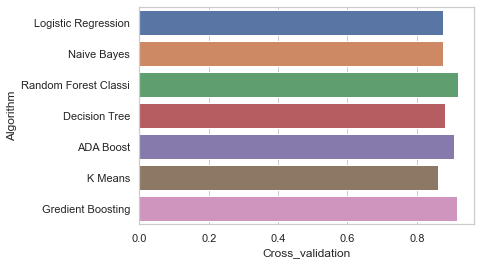

In [373]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

#### Based on precision, recall, f1-score and cross validation scores the Random forest classifier, Ada Boost classifier are having the best results 

<AxesSubplot:>

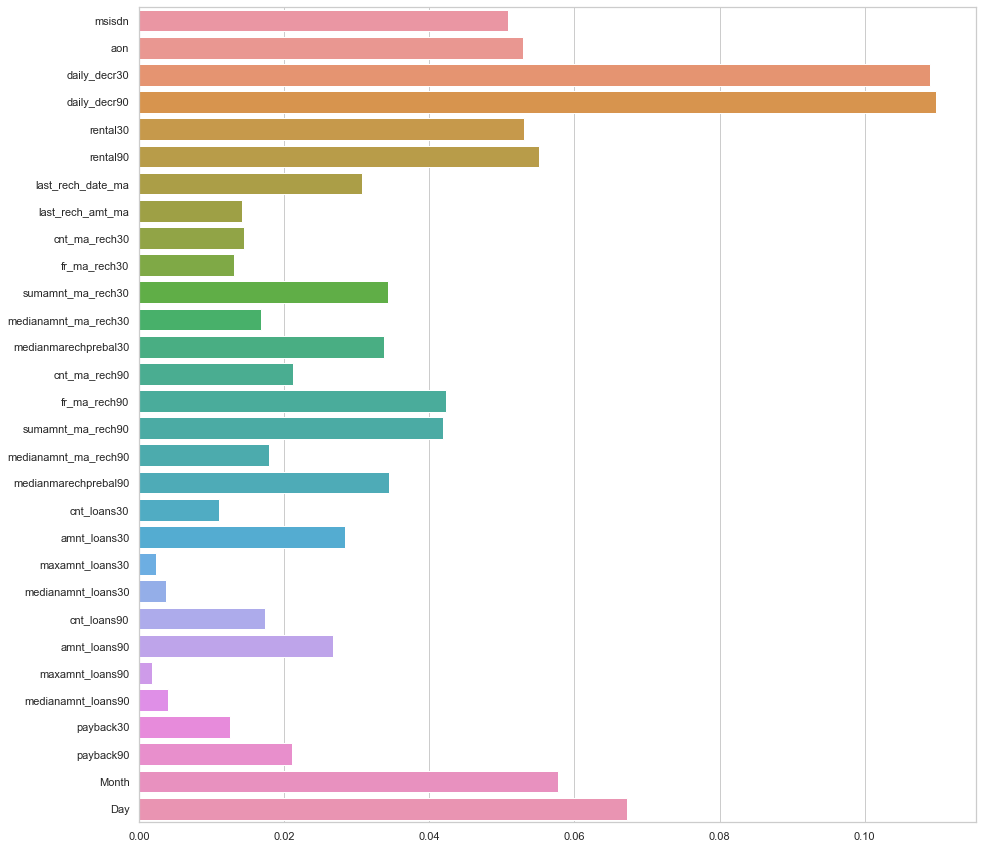

In [419]:
plt.figure(figsize=(15,15))
sns.barplot(y=df.columns,x=mod_3.feature_importances_)

#### From the above plot we can conclude that the columns Daily Decr30,Daily Decr30 and Day are turning out to be the most important features in predicting whether an individual will repay the loan or not.   

### Hyperparametric Tuning

#### Random Search CV

In [374]:
from sklearn.model_selection import RandomizedSearchCV

##### Hyperparametric Tuning of Random Forest Classifier

In [375]:
mod_3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [376]:
n_estimators = [100,150,200,250,300]
criterion = ["gini","entropy"]
max_features = ["auto","sqrt","log2"]
class_weight = ["balanced","balanced_subsample"]
min_samples_leaf = [1,2,3,4,5]

In [377]:
parameters = {
    "n_estimators":n_estimators,
    "criterion":criterion,
    "max_features":max_features,
    "class_weight":class_weight,
    "min_samples_leaf":min_samples_leaf
   }

In [378]:
print(parameters)

{'n_estimators': [100, 150, 200, 250, 300], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'class_weight': ['balanced', 'balanced_subsample'], 'min_samples_leaf': [1, 2, 3, 4, 5]}


In [379]:
rfr = RandomForestClassifier()

In [380]:
random_search_rfr = RandomizedSearchCV(estimator=rfr,param_distributions=parameters,cv=3,n_jobs=-1,verbose=2)                                                                 

In [381]:
random_search_rfr.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=2)

#### Best Estimators

In [382]:
random_search_rfr.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt', min_samples_leaf=2)

#### Best Parameters

In [383]:
random_search_rfr.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample'}

#### Best Score

In [384]:
random_search_rfr.best_score_

0.9196979528480731

In [385]:
predictions_rfr = random_search_rfr.predict(X_test)

#### Confusion Matrix

In [386]:
print(confusion_matrix(y_test,predictions_rfr))
print("\n")

[[ 3737  2771]
 [ 1435 44456]]




#### Classification Report

In [387]:
print(classification_report(y_test,predictions_rfr))
print("\n")

              precision    recall  f1-score   support

           0       0.72      0.57      0.64      6508
           1       0.94      0.97      0.95     45891

    accuracy                           0.92     52399
   macro avg       0.83      0.77      0.80     52399
weighted avg       0.91      0.92      0.92     52399





##### Hyperparametric Tuning of ADA Boost Classifier

In [388]:
mod_6.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [389]:
n_estimators=[50,100,150,200]

learning_rate=[0.01,0.05,0.1,0.3,1]

algorithm=["SAMME","SAMME.R"]

In [390]:
parameters = {
    "n_estimators":n_estimators,
    "learning_rate":learning_rate,
    "algorithm":algorithm
}

In [391]:
print(parameters)

{'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'algorithm': ['SAMME', 'SAMME.R']}


In [392]:
ab = AdaBoostClassifier()

In [393]:
random_search_ab = RandomizedSearchCV(estimator=ab,param_distributions=parameters,cv=3,n_jobs=-1,verbose=2)                                                                 

In [394]:
random_search_ab.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

#### Best Estinators

In [395]:
random_search_ab.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=100)

#### Best Parameters

In [396]:
random_search_ab.best_params_

{'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

#### Best Score

In [397]:
random_search_ab.best_score_

0.911160731325623

In [398]:
predictions_ab = random_search_ab.predict(X_test)

#### Confusion Matrix

In [399]:
print(confusion_matrix(y_test,predictions_ab))
print("\n")

[[ 2711  3797]
 [  911 44980]]




#### Classification Report

In [400]:
print(classification_report(y_test,predictions_ab))
print("\n")

              precision    recall  f1-score   support

           0       0.75      0.42      0.54      6508
           1       0.92      0.98      0.95     45891

    accuracy                           0.91     52399
   macro avg       0.84      0.70      0.74     52399
weighted avg       0.90      0.91      0.90     52399





#### Based on F1 Score which is an important matrix in classification the Random forest classifier is performing better than Ada Boost classifier

### ROC AUC CURVE

In [401]:
from sklearn.metrics import roc_curve,roc_auc_score

In [402]:
y_pred_prob = random_search_rfr.predict_proba(X_test)[:,1]

In [403]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [404]:
fpr

array([0.        , 0.00245851, 0.00245851, ..., 0.9978488 , 0.99815612,
       1.        ])

In [405]:
tpr

array([0.        , 0.22592665, 0.22594844, ..., 1.        , 1.        ,
       1.        ])

In [406]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99703554e-01, ...,
       1.00019974e-03, 9.93874522e-04, 3.37424656e-04])

Text(0.5, 1.0, 'Random Forest Classification')

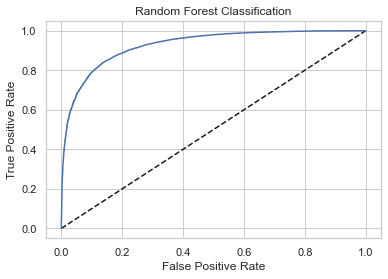

In [407]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classification')

#### Based on the AUC (Area Under the Curve) we can say that our model is performing well

## Saving the model using Pickle

In [408]:
import pickle

In [410]:
with open("model_pickle","wb") as f:
    
    pickle.dump(random_search_rfr,f)

In [411]:
with open("model_pickle","rb") as f:
    
    loan = pickle.load(f)

## Conclusion

In [412]:
df.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,2140870789,5.609472,8.024879,8.028178,-1.069255,-1.041421,1.098612,0.061095,1.098612,-0.896035,8.032360,0.310522,2.140066,1.098612,3.091042,8.032360,7.339538,2.140066,1.098612,2.564949,-0.245447,-0.269051,-0.100737,-0.116817,-0.285611,-0.248272,1.644447,1.630079,7,20
1,7646270374,6.569481,9.402860,9.403087,1.015349,0.808155,3.044522,1.799606,0.693147,-0.896035,8.663542,2.316530,4.127779,0.693147,0.000000,8.663542,8.663542,4.127779,0.693147,2.564949,2.301616,-0.269051,-1.153439,-0.116817,2.325828,-0.248272,-0.954773,-1.042532,8,10
2,1794370372,6.284134,7.243513,7.243513,-0.146513,-0.272648,1.386294,0.061095,0.693147,-0.896035,7.339538,0.310522,4.209457,0.693147,0.000000,7.339538,7.339538,4.209457,0.693147,1.945910,-0.245447,-0.269051,-1.153439,-1.208127,-0.285611,-0.248272,-0.954773,-1.042532,8,19
3,5577370781,5.488938,3.101353,3.101353,-1.248368,-1.299169,1.386294,-0.762611,1.098612,-0.896035,8.300529,-0.242565,3.552487,0.693147,0.000000,6.854355,6.854355,1.252763,1.098612,2.564949,-0.245447,-0.269051,-0.100737,-0.116817,-0.285611,-0.248272,-0.954773,-1.042532,6,6
4,381382730,6.854355,5.021373,5.021373,0.003125,-0.133371,1.609438,0.663332,2.079442,0.243035,9.904986,1.015357,3.401197,2.197225,1.098612,10.064628,7.968666,3.583519,2.079442,3.761200,-0.245447,-0.269051,1.430608,1.379270,-0.285611,-0.248272,0.736209,0.530929,6,22


In [413]:
cm = confusion_matrix(y_test,predictions_rfr)

<AxesSubplot:>

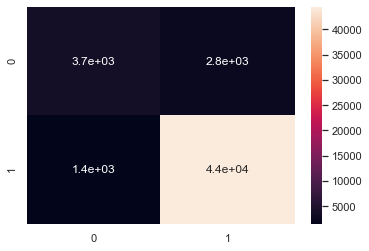

In [414]:
sns.heatmap(data=cm,annot=True)

In [415]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions_rfr.reshape(len(predictions_rfr),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 1]
 [1 1]]


### Most of the predictions are right.